<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# EDA on McDonald's Data

<img src="https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/banner.jpg" align='left'><br/>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis based on Outlet metrics**](#section501)<br>
    - 5.1.1 [How many stores are actually owned and run by McDonald's?](#section50101)<br>
    - 5.1.2 [Which outlets generate maximum revenue for the company?](#section50102)<br>
    - 5.1.3 [Top 10 Outlets in terms of Profit](#section50103)<br>
    - 5.1.4 [Outlets with highest Number of Employees](#section50104)<br>
    - 5.1.5 [Where do you find the maximum footfall in McDonald's?](#section50105)<br><br>
  - 5.2 [**Analysis based on Nutritional Value**](#section502)<br>
      - 5.2.1 [Which is the most common category on menu?](#section50201)<br>
      - 5.2.2 [How many calories (energy) on an average are present in each category of McDonald's menu?](#section50202)<br>
      - 5.2.3 [Is there any difference in the nutritional value of a grilled vs crispy chicken?](#section50203)<br>
      - 5.2.4 [On an average, how much sugar consumption happens when you order Desserts, Beverages, Smoothies and Shakes?](#section50204)<br>
      - 5.2.5 [In what sort of foods and beverages do manufacturers include fiber?](#section50205)<br> 
      - 5.2.6 [How to select Nutritious and Non-Nutritious food from menu?](#section50206)<br> 
      - 5.2.7 [Which is the most proteinaceous item on the menu?](#section50207)<br> <br>
  - 5.3 [**Analysis based on Geographical Information**](#section503)<br>
    - 5.3.1 [Which city has the highest number of McDonald's outlets per capita?](#section50301)<br>
    - 5.3.2 [Which state has the highest number of McDonald's outlets per capita?](#section50302)<br>
    - 5.3.3 [Outlet locations in India](#section50303)<br>
    - 5.3.4 [Outlet locations in India](#section50304)<br><br>
  - 5.4 [**Analysis based on Outlet metrics and Nutritional value**](#section504)<br>
    - 5.4.1 [Which outlets have most nutritious item as their best selling item?](#section50401)<br>
    - 5.4.2 [What is the Revenue of the outlet based on the category of its best selling item?](#section50402)<br>
    - 5.4.3 [How much is the Total Selling Price of the outlet based on the category of its best selling item?](#section50403)<br>
    - 5.4.4 [How much is the Total Cost Price of the outlet based on the category of its best selling item?](#section50404)<br><br>
  - 5.5 [**Analysis based on Outlet Metrics and Geographical Information**](#section505)<br>
    - 5.5.1 [Where did McDonald's entered into Joint Venture to start their Outlets?](#section50501)<br>
    - 5.5.2 [Top 10 outlets in India and US based on revenue](#section50502)<br>
    - 5.5.3 [What is the mean revenue of outlets in each US state?](#section50503)<br>
    - 5.5.4 [How much is the Gross Profit Margin of each outlet?](#section50504)<br><br>
  - 5.6 [**Analysis based on Nutritional value and Geographical information**](#section506)<br>
    - 5.6.1 [Comparison of Nutritional content of each category between India and US](#section50601)<br>
    - 5.6.2 [How are Indian menu items compare to US menu items in terms of nutrition?](#section50602)<br><br>
  - 5.7 [**Analysis based on outlet metrics, menu items, and geographical information**](#section507)<br>
    - 5.7.1 [How is the revenue generation based on different menu items in India and US?](#section50701)<br><br>
6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

### New Data

1. [New Entry](#section3)<br>

<a id=section1></a>
## 1. Problem Statement

**McDonald's** is hip all over the world, including in India. However, the McDonald's menu is not universal. In **India**, there are some **menu items** that are similar, but others that are much **different from the U.S. menu**. Through **comparing the McDonald's menu in the U.S. and India**, we can see that fast food menus can truly **give us a perspective on cultural and economic similarities and differences throughout the world**. 

<img src = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/mcdonalds.jpg'>

---

<a id=section2></a>
## 2. Importing Packages

In [2]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each columnimport matplotlib.pyplot as plt
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [4]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in /home/nbuser/anaconda3_420/lib/python3.5/site-packages (4.5.4)


In [4]:
# Install chart_studio, please use this command. 

!pip install chart-studio

You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
!pip install seaborn==0.9.0

You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

---

### Disclaimer: The images are only for illustration purpose. Please don't compare them with the data.

<a id=section3></a>
## 3. Loading Data

In this **Data Visualization** sheet we are using two datasets about **McDonald's**. 

<img src="https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/mcdonalds_logo.jpg" width=750 height=750><br/>

- 1. **Nutrition Facts for McDonald's Menu** dataset: This dataset contains information about the **nutritional content** present in different items on **McDonald's Menu** for **India and US** stores.


- 2. **McDonald's Outlet's Information** dataset: This dataset contains information about various **McDonald's outlets** in **India and US**. 

### Importing 1st Dataset

In [6]:
# Importing the 1st dataset (Nutrition Facts for McDonald's Menu dataset).

df_menu = pd.read_excel('https://github.com/insaid2018/Term-1/raw/master/Data/Casestudy/mcdonalds_menu.xlsx')
df_menu.head()

,Category,Item,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,Breakfast,Egg & Cheese Muﬃn,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,Breakfast,Sausage McMuﬀm,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,Breakfast,Sausage & Egg McMuﬀm,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,Breakfast,Veg McMuﬀm,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,Breakfast,Veg Supreme Muﬃn,139,299,7,13.0,5.2,0.2,11,39,4,4,960


<a id=section301></a>
### Description of the Dataset

- This dataset provides a **nutrition analysis** of different menu items on the **McDonald's menu** in **India and US**, including breakfast, chicken wings, shake, snacks, hot beverages, cold beverages and desserts.


- Detailed information about each nutrient column can be found at this [link](https://www.fda.gov/food/nutrition-education-resources-materials/how-understand-and-use-nutrition-facts-label).


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Category                       | The category to which an item belong to.                                                   | 
| Item                           | Name of the item.                                                                          | 
| Serve_Size                     | The weight of a single serving (g).                                                        | 
| Energy                         | Number of calories in the item (kcal).                                                     |
| Protein                        | Protein in the item (g).                                                                   |
| Total_Fat                      | Total Fat in the item (g).                                                                 |
| Saturated_Fat                  | Saturated Fat in the item (g).                                                             |
| Trans_Fat                      | Trans Fat in the item (g).                                                                 |
| Cholestrol                     | Cholestrol in the item (mg).                                                               |
| Carbohydrates                  | Carbohydrates in the item (g).                                                             |
| Sugars                         | Sugars in the item (g).                                                                    |
| Dietary_Fibre                  | Dietary Fibres in the item (g).                                                            |
| Sodium                         | Sodium in the item (mg).                                                                   |


<img src="https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/Mcd.png" width=750 height=750><br/>


In [6]:
df_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 13 columns):
Category         340 non-null object
Item             340 non-null object
Serve_Size       340 non-null object
Energy           340 non-null int64
Protein          340 non-null int64
Total_Fat        340 non-null float64
Saturated_Fat    340 non-null float64
Trans_Fat        340 non-null float64
Cholestrol       340 non-null int64
Carbohydrates    340 non-null int64
Sugars           340 non-null int64
Dietary_Fibre    340 non-null int64
Sodium           340 non-null object
dtypes: float64(3), int64(6), object(4)
memory usage: 34.6+ KB


- ```info``` function gives us the following insights into the df_menu dataframe:

  - There are a total of **340 samples (rows)** and **13 columns** in the dataframe.
  
  - There are **9 columns** with a **numeric** datatype and **4 columns** with an **object** datatype.
  
  - There are **0 missing** values in the data.

### Importing 2nd Dataset

In [7]:
# Importing the 2nd dataset (McDonald's Store Information dataset).

df_store = pd.read_excel('https://github.com/insaid2018/Term-1/raw/master/Data/Casestudy/mcdonalds_outlets.xlsx')
df_store.head()

,Brand,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item
0,McDonald's,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,500034,NaN,GMT+05:30 Asia/New_Delhi,78.45,17.42,2.117344,0.171584,1.655165,0.907433,0.747732,34.311197,3979.583117,Egg & Cheese Muﬃn
1,McDonald's,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,500072,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.48,1.058504,0.054645,0.895944,0.453645,0.442299,25.487533,1156.010620,Sausage McMuﬀm
2,McDonald's,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,500081,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.43,4.505020,0.663867,2.864311,1.930723,0.933588,54.208502,10346.720786,Sausage & Egg McMuﬀm
3,McDonald's,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,500033,NaN,GMT+05:30 Asia/New_Delhi,78.42,17.42,3.405530,0.397835,2.394072,1.459513,0.934559,45.046083,7414.746544,Veg McMuﬀm
4,McDonald's,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,500084,NaN,GMT+05:30 Asia/New_Delhi,78.38,17.45,7.332713,1.656524,3.395053,3.142591,0.252461,77.772607,17887.234107,Veg Supreme Muﬃn


### Description of the Dataset

- This dataset provides information different **McDonald's India outlets** like their Store ID, Address, City, State, Revenue, Profits, Number of Employees, Most Selling Item, etc.


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Brand                          | Brand name.                                                                                | 
| Store ID                       | ID of the store.                                                                           | 
| Store Name                     | Name of the store.                                                                         |
| Ownership Type                 | Ownership type of the store.                                                               |
| Street Address                 | Address of the store's location.                                                           |
| City                           | City of the store's location.                                                              |
| State                          | State of the store's location.                                                             |
| Country                        | Country of the store's location.                                                           |
| Postcode                       | Postcode of the store's location.                                                          |
| Phone Number                   | Phone number of the store.                                                                 |
| Timezone                       | Timezone of the store's location.                                                          |
| Longitude                      | Longitude of the store's location.                                                         |
| Latitude                       | Latitude of the store's location.                                                          |
| Revenue                        | Revenue of the store (in million Indian Rupees).                                           |
| Profits                        | Profits of the store (in million Indian Rupees).                                           |
| Selling Price                  | Total Selling Price of items of the store (in million Indian Rupees).                      |
| Cost Price                     | Total Cost Price of items of the store (in million Indian Rupees).                         |
| Gross Profit Margin            | Gross Profit Margin of the store (in million Indian Rupees).                               |
| Number of Employees            | Number of employees of the store.                                                          |
| Customers                      | Number of monthly customeres of the store.                                                 |
| Best Selling Item              | Most selling item of the store.                                                            |


<img src="https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/store.jpg" width=750 height=750><br/>


In [8]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 21 columns):
Brand                  340 non-null object
Store ID               340 non-null object
Store Name             340 non-null object
Ownership Type         340 non-null object
Street Address         340 non-null object
City                   340 non-null object
State                  340 non-null object
Country                340 non-null object
Postcode               340 non-null int64
Phone Number           248 non-null object
Timezone               340 non-null object
Longitude              340 non-null float64
Latitude               340 non-null float64
Revenue                340 non-null float64
Profits                340 non-null float64
Selling Price          340 non-null float64
Cost Price             340 non-null float64
Gross Profit Margin    340 non-null float64
Number of Employees    340 non-null float64
Customers              340 non-null float64
Best Selling Item      340 

In [9]:
df_menu['Item'].nunique()

340

In [10]:
df_store['Best Selling Item'].nunique()

340

- ```info``` function gives us the following insights into the df_store dataframe:

  - There are a total of **340 samples (rows)** and **21 columns** in the dataframe.
  
  - There are **10 columns** with a **numeric** datatype and **11 columns** with an **object** datatype.
  
  - There are **missing** values in the **Phone Number** column.

- We are going to perform a **merge** on the **two dataframes**, **df_store and df_menu** on the basis of **Best Selling Item** of **df_store** dataframe and **Item** column of **df_menu** dataframe to create a new dataframe **df_merge**, in order to make our **EDA** easier.

In [8]:
df_merge = pd.merge(df_store, df_menu, how='inner', left_on='Best Selling Item', right_on='Item').drop(['Item'], 1)
df_merge.head()

,Brand,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,McDonald's,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,500034,NaN,GMT+05:30 Asia/New_Delhi,78.45,17.42,2.117344,0.171584,1.655165,0.907433,0.747732,34.311197,3979.583117,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,McDonald's,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,500072,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.48,1.058504,0.054645,0.895944,0.453645,0.442299,25.487533,1156.010620,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,McDonald's,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,500081,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.43,4.505020,0.663867,2.864311,1.930723,0.933588,54.208502,10346.720786,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,McDonald's,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,500033,NaN,GMT+05:30 Asia/New_Delhi,78.42,17.42,3.405530,0.397835,2.394072,1.459513,0.934559,45.046083,7414.746544,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,McDonald's,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,500084,NaN,GMT+05:30 Asia/New_Delhi,78.38,17.45,7.332713,1.656524,3.395053,3.142591,0.252461,77.772607,17887.234107,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960


In [12]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 339
Data columns (total 33 columns):
Brand                  340 non-null object
Store ID               340 non-null object
Store Name             340 non-null object
Ownership Type         340 non-null object
Street Address         340 non-null object
City                   340 non-null object
State                  340 non-null object
Country                340 non-null object
Postcode               340 non-null int64
Phone Number           248 non-null object
Timezone               340 non-null object
Longitude              340 non-null float64
Latitude               340 non-null float64
Revenue                340 non-null float64
Profits                340 non-null float64
Selling Price          340 non-null float64
Cost Price             340 non-null float64
Gross Profit Margin    340 non-null float64
Number of Employees    340 non-null float64
Customers              340 non-null float64
Best Selling Item      340 

- ```info``` function gives us the following insights into the df_merge dataframe:

  - There are a total of **340 samples (rows)** and **33 columns** in the dataframe.
  
  - There are **19 columns** with a **numeric** datatype and **14 columns** with an **object** datatype.
  
  - There are **missing** values in the **Phone Number** column.

In [13]:
df_merge.describe()

,Postcode,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre
count,3.400000e+02,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,2.902141e+08,-56.761000,33.487647,25.853416,4.643606,14.603346,11.080035,3.523310,90.556231,13071.990651,337.800000,11.694118,13.050000,5.595588,0.183235,47.544118,43.770588,26.347059,1.544118
std,3.649787e+08,76.967267,9.945169,14.476980,3.406981,9.467746,6.204420,5.193082,31.352258,6993.912334,231.850796,10.990770,13.639604,5.219422,0.381715,81.815469,26.936400,26.896340,1.663719
min,2.134000e+03,-158.020000,12.910000,1.001099,0.050085,0.850867,0.429042,-4.881901,25.009156,1002.929777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.043625e+04,-99.325000,28.522500,15.301218,1.829762,6.913135,6.557665,0.069328,64.577738,6877.498703,176.500000,2.000000,1.375000,0.500000,0.000000,4.000000,28.000000,4.000000,0.000000
50%,5.600790e+05,-87.265000,35.105000,27.056185,3.893049,13.711362,11.595508,1.433993,89.164403,13373.546556,299.500000,10.000000,10.000000,4.550000,0.000000,25.000000,41.000000,16.000000,1.000000
75%,6.604731e+08,-71.122500,40.100000,37.930464,6.919813,20.425337,16.255913,6.184580,115.515610,19245.185705,460.000000,17.000000,20.000000,9.000000,0.100000,55.000000,56.000000,43.250000,3.000000
max,9.966980e+08,80.260000,61.600000,49.680624,13.514181,40.275006,21.291696,19.459398,149.087497,24964.842677,1880.000000,87.000000,118.000000,24.100000,2.500000,575.000000,141.000000,128.000000,9.000000


- ```describe``` function gives us the following insights into the data:
  
  - **Revenue** column is having an almost **normal distribution** because the **mean (25.8534)** value is close to the **median (27.0561)** value.

  - The distribution of **Energy** is **positive (right) skewed** because the **mean** of **Energy (337.800)** lies to the **right** of the **median(50%)** value **(299.500)**, on a **distribution plot**. 
  
  - The **max** value of **Energy (1880.000)** is an **outlier** because it lie far away from the mean.
  
  - Similarly comparing the **75%** and **max** values of the other columns we can see that there are **outliers** present in some other columns.

---

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [12]:
# To install pandas profiling please run this command.

!pip install pandas-profiling==2.2.0 --upgrade

Processing /home/nbuser/.cache/pip/wheels/c7/c6/58/3a7be8f84fbe64a88f8c3e5cf0360e5abfbdc321d3d421df21/pandas_profiling-2.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5f/f3/b764d2ae5dfc8c623125346cbc26db3523c50351b2e1817d603c84df0518/phik-0.9.10-py3-none-any.whl
Processing /home/nbuser/.cache/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd/confuse-1.0.0-cp35-none-any.whl
  Using cached https://files.pythonhosted.org/packages/31/ef/e848f832a596a8a40b32d8aa169788b4df167c2d6a5960c01e83a30ebaa7/pytest_pylint-0.15.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/79/6c/05a569e9f703d18aacb89b7ad6075b404e8a4afde2c26b73ca77bb644b14/nbconvert-5.6.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e9/59/43fc36c5ee316bb9aeb7cf5329cdbdca89e5749c34d5602753827c0aa2dc/pylint-2.4.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c7/bc/9c2bbd8bff5f393e3373687109117a061db4c

  Using cached https://files.pythonhosted.org/packages/ad/ae/86734823047962e7b8c8529186a1ac4a7ca19aaf1aa0c7713c022ef593fd/astroid-2.3.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f4/24/2a3e3df732393fed8b3ebf2ec078f05546de641fe1b667ee316ec1dcf3b7/webencodings-0.5.1-py2.py3-none-any.whl
Processing /home/nbuser/.cache/pip/wheels/d7/de/2e/efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd/wrapt-1.11.2-cp35-cp35m-linux_x86_64.whl
ERROR: astroid 2.3.3 has requirement six~=1.12, but you'll have six 1.11.0 which is incompatible.
ERROR: phik 0.9.10 has requirement pandas>=0.23.4, but you'll have pandas 0.19.2 which is incompatible.
  Found existing installation: wrapt 1.10.6
ERROR: Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
import pandas_profiling

In [11]:
from pandas_profiling import ProfileReport

In [11]:
profile = df_merge.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")

In [10]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html
'''
profile = df_merge.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")
'''

# To output the pandas profiling report on the notebook.

df_merge.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

ValueError: Config parameter "style" does not exist.

In [13]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = df_merge.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")


# To output the pandas profiling report on the notebook.

#df_merge.profile_report(title='Pandas Profiling before Data Preprocessing')

AttributeError: module 'attr' has no attribute 's'

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 33
- Number of observations: 340
- Missing cells: 92 (0.8%)


__Variables types__: 
- Numeric = 16
- Categorical = 10
- Text (Unique) = 3
- Rejected = 4

<br>

- **Brand** has **constant value "McDonald's"**.


- **Phone_Number** has **92 (27.1%) missing values**.


- **Number_of_Employees** is **highly correlated** with **Cost_Price (ρ = 0.9091375321)**.


- **Revenue** is **highly correlated** with **Number_of_Employees (ρ = 0.9091375321)**.


- **Total_Fat** is **highly correlated** with **Energy (ρ = 0.9065)**.


- **City** has a **high cardinality (139 distinct values)**.


- **Phone_Number** has a **high cardinality (249 distinct values)**.


- **Serve_Size** has a **high cardinality (161 distinct values)**.


- **Street_Address** has a **high cardinality (339 distinct values)**.




- **Cholestrol** has a **skewness** of **3.8984** and **kurtosis** of **18.847**.

  - The distribution is **positive (right) skewed** as the **mean (47.544)** is to the **right** of the **median (25)**.
  
  - **95%** samples have a **Cholestrol** less than **250**.
  
  - The high value of **kurtosis** implies that the tail is heavy and there is a presence of outliers in the data (**maximum value = 575 is an outlier**).
  

- **Carbohydrates** has a **skewness** of **0.9975** and **kurtosis** of **1.8172**.

  - **Maximum value = 141** is an **outlier**, as it lies far away from the **Q3 (75th percentile)** value **(55)**.


- **Category** has data divided into **14** distinct values.
  
  - __Hot Beverages__ has the **highest** share with **99** samples **(29.1% share)** and then **Breakfast** has **49** samples **(14.4% share)**.
 			
  
- **Country** has data divided into **2** distinct values.
  
  - __US__ has **258** samples **(75.9% share)** and **IN** has **82** samples **(24.1% share)**.
  
 
- **Energy** has a **skewness** of **1.4793** and **kurtosis** of **5.7022**.

  - **Maximum value = 1880** is an **outlier**, as it lies far away from the **Q3 (75th percentile)** value **(460)**.
 

- **Ownership_Type** has data divided into **3** distinct categories.
  
  - __Company Owned__ has **137** samples **(40.3% share)**, **Licensed** has **121** samples **(35.6% share)**, and **Joint Venture** has **82** samples **(24.1% share)**.
  
  
- **Protein** has a **skewness** of **1.639** and **kurtosis** of **6.0817**.

  - **Maximum value = 87** is an **outlier**, as it lies far away from the **Q3 (75th percentile)** value **(17)**.
  
  
- All the **remaining columns** can be studied in the same way.

---

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


- In order to avoid any errors, please run **Pandas Profiling** before running the code below.

In [14]:
df_merge.head(2)

,Brand,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,McDonald's,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,500034,NaN,GMT+05:30 Asia/New_Delhi,78.45,17.42,2.117344,0.171584,1.655165,0.907433,0.747732,34.311197,3979.583117,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,McDonald's,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,500072,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.48,1.058504,0.054645,0.895944,0.453645,0.442299,25.487533,1156.010620,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950


- Since the column **Brand** has a **constant value** for all the samples, we will drop this column.


- Also the columns **Postcode, Phone Number, and Timezone** will be **dropped** because they **don't provide** any additional **insights** into the data.

In [9]:
df_merge.drop(['Brand', 'Postcode', 'Phone Number', 'Timezone','Street Address'], axis=1, inplace=True)

In [9]:
df_merge.head(2)

,Store ID,Store Name,Ownership Type,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,23149-228271,Banjara Hills,Joint Venture,Hyderabad,AP,IN,78.45,17.42,2.117344,0.171584,1.655165,0.907433,0.747732,34.311197,3979.583117,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,23191-228548,Kukatpally,Joint Venture,Hyderabad,AP,IN,78.39,17.48,1.058504,0.054645,0.895944,0.453645,0.442299,25.487533,1156.010620,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950


- **Rounding** the **values** of **Revenue, Profits, Sellling_Price, Cost_Price, Gross_Profit_Margin** columns to 3 decimal places.

In [10]:
df_merge = df_merge.round(decimals=3)
df_merge.head()

,Store ID,Store Name,Ownership Type,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,23149-228271,Banjara Hills,Joint Venture,Hyderabad,AP,IN,78.45,17.42,2.117,0.172,1.655,0.907,0.748,34.311,3979.583,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,23191-228548,Kukatpally,Joint Venture,Hyderabad,AP,IN,78.39,17.48,1.059,0.055,0.896,0.454,0.442,25.488,1156.011,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,23193-228546,Madhapur,Joint Venture,Hyderabad,AP,IN,78.39,17.43,4.505,0.664,2.864,1.931,0.934,54.209,10346.721,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,23180-228545,Jubilee Hills,Joint Venture,Hyderabad,AP,IN,78.42,17.42,3.406,0.398,2.394,1.460,0.935,45.046,7414.747,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,24457-238129,Hi-Tech City,Joint Venture,Hyderabad,AP,IN,78.38,17.45,7.333,1.657,3.395,3.143,0.252,77.773,17887.234,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960


- The **Number of Employees** and **Customers** columns have values in **decimals**, which is not possible because **count of people** is an example of **natural number**.


- This looks like a **Data Entry error**, and we will modify the values to lie in the **set of natural numbers**.

In [11]:
## Using apply(np.floor) to get the floor of the values.

df_merge['Number of Employees'] = df_merge['Number of Employees'].apply(np.floor).astype(int)
df_merge['Customers'] = df_merge['Customers'].apply(np.floor).astype(int)
df_merge.head()

,Store ID,Store Name,Ownership Type,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,23149-228271,Banjara Hills,Joint Venture,Hyderabad,AP,IN,78.45,17.42,2.117,0.172,1.655,0.907,0.748,34,3979,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,23191-228548,Kukatpally,Joint Venture,Hyderabad,AP,IN,78.39,17.48,1.059,0.055,0.896,0.454,0.442,25,1156,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,23193-228546,Madhapur,Joint Venture,Hyderabad,AP,IN,78.39,17.43,4.505,0.664,2.864,1.931,0.934,54,10346,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,23180-228545,Jubilee Hills,Joint Venture,Hyderabad,AP,IN,78.42,17.42,3.406,0.398,2.394,1.460,0.935,45,7414,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,24457-238129,Hi-Tech City,Joint Venture,Hyderabad,AP,IN,78.38,17.45,7.333,1.657,3.395,3.143,0.252,77,17887,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960


- **Serve_Size** column has some **irregularities** present, let's fix them.  

In [12]:
# Checking the different types of values in the Serve_Size column. Looking at every 4th value after 50th value.

#df_merge['Serve_Size'].unique()[::5]
df_merge['Serve_Size'].unique()

array([112, 157, 119, 139, '142 g', 64, 115, 246, '173 g', '136 g', 130,
       '169 g', 146, 199, 272, '186 g', 260, 110, 156, '220 g', 87, 96,
       144, 90, 180, 9, 25, 14, 10, 200, 275, 402, 277, 400, '249 g', 344,
       494, 249, '344 g', 300, '500 g', 250, 237, 247, 81, 93, '97 g',
       '92 g', '132 g', 92, 132, 111, 155, 147, 94, 167, '200 g', 141,
       133, 121, '123 g', 136, 135, 161, 185, 150, 164, 153, 117, 131,
       163, 177, 181, 143, 201, 174, 178, 205, 197, 241, '269 g', 283,
       '286 g', 420, 434, '423 g', 437, 151, 192, '111 g', 114, 251,
       '211 g', 202, 227, 235, 244, 98, 113, 270, '190 g', 159, 208, 213,
       230, 217, '284 g', 160, 171, 148, 316, 302, 310, 297, 314, 318,
       304, 291, 65, 97, 162, 323, 646, 142, 223, 255, 348, 335, '130 g',
       123, 116, 128, '121 g', 75, 168, '38 g', 34, 149, 77, '33 g', 33,
       29, 179, 182, 453, 595, 850, 340, '453 g', 236, 170, 623, 479,
       '595 g', 566, '566 g', '340 g', 907, '907 g', '623 g', 460

In [13]:
# Removing all the unwanted text (oz, cookie, carton, cup, (, ), g, ml, etc.) from the Serve_Size column.
# Using '\d' in the str.replace which is used to specify all the digits between 0-9.

#df_merge['Serve_Size'] = df_merge['Serve_Size'].astype(str).str.replace('[\.\d]+ oz ', '').str.replace('[\d]+ cookie ', '').str.replace('[\d]+ carton ', '').str.replace(' cup', '').str.replace('[\(\)]', '').str.replace(' g', '').str.replace(' ml', '').str.replace(' [\d]+', '')
df_merge['Serve_Size']=df_merge['Serve_Size'].astype(str).str.replace(' g','')

In [14]:
# We can see that only the samples having 'fl oz' in them remain in the column.

df_merge['Serve_Size'].unique()[110::3]

array(['291', '323', '255', '116', '168', '149', '29', '453', '340',
       '623', '907', '285'], dtype=object)

- Here we can see that some of the values in the **Serve_Size** column have their **weight** mention in **oz**.


- **1 ounce (oz)** is **equal** to **28.34952 grams (g)**.


- We will **extract** the **oz** values from these samples and **replace** them with their respective values in **grams**.

In [ ]:
# Only text to remove from the Serve_Size column is ' fl oz'. Saving the index of rows having these values into serve_index.

serve_index = df_merge[df_merge['Serve_Size'].str.contains(' fl oz')].index

In [ ]:
# Removing ' fl oz' from the rows and replacing it with the value in grams.

df_merge.iloc[serve_index, 18] = (df_merge.iloc[serve_index, 18].str.replace(' fl oz', '').astype(float) * 28.34952)

In [15]:
df_merge['Serve_Size'] = df_merge['Serve_Size'].astype(int)
#df_merge['Serve_Size'].unique()[::8]
df_merge['Serve_Size'].unique()

array([112, 157, 119, 139, 142,  64, 115, 246, 173, 136, 130, 169, 146,
       199, 272, 186, 260, 110, 156, 220,  87,  96, 144,  90, 180,   9,
        25,  14,  10, 200, 275, 402, 277, 400, 249, 344, 494, 300, 500,
       250, 237, 247,  81,  93,  97,  92, 132, 111, 155, 147,  94, 167,
       141, 133, 121, 123, 135, 161, 185, 150, 164, 153, 117, 131, 163,
       177, 181, 143, 201, 174, 178, 205, 197, 241, 269, 283, 286, 420,
       434, 423, 437, 151, 192, 114, 251, 211, 202, 227, 235, 244,  98,
       113, 270, 190, 159, 208, 213, 230, 217, 284, 160, 171, 148, 316,
       302, 310, 297, 314, 318, 304, 291,  65, 162, 323, 646, 223, 255,
       348, 335, 116, 128,  75, 168,  38,  34, 149,  77,  33,  29, 179,
       182, 453, 595, 850, 340, 236, 170, 623, 479, 566, 907, 460, 207,
       285, 381, 403])

- Lastly fixing the **Sodium** column.

In [16]:
df_merge['Sodium'].value_counts()[:5]

-      15
0      14
180    11
150    8 
190    8 
Name: Sodium, dtype: int64

In [17]:
# Calculating the median of the rows which don't have Sodium value '-'.

df_merge[~(df_merge['Sodium'] == '-')]['Sodium'].median()

230.0

In [18]:
df_merge['Sodium'] = df_merge['Sodium'].astype(str).str.replace('-', '230').astype(int)

In [19]:
df_merge['Sodium'].value_counts()[:20]

230    16
0      14
180    11
140    8 
150    8 
170    8 
190    8 
135    7 
10     7 
240    6 
160    6 
220    6 
390    6 
50     6 
115    6 
260    5 
5      5 
125    5 
65     5 
110    4 
Name: Sodium, dtype: int64

In [20]:
df_merge.isnull().sum()

Store ID               0
Store Name             0
Ownership Type         0
City                   0
State                  0
Country                0
Longitude              0
Latitude               0
Revenue                0
Profits                0
Selling Price          0
Cost Price             0
Gross Profit Margin    0
Number of Employees    0
Customers              0
Best Selling Item      0
Category               0
Serve_Size             0
Energy                 0
Protein                0
Total_Fat              0
Saturated_Fat          0
Trans_Fat              0
Cholestrol             0
Carbohydrates          0
Sugars                 0
Dietary_Fibre          0
Sodium                 0
dtype: int64

---

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling_after_preprocessing.html__.

In [26]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html

profile = df_merge.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="profiling_after_preprocessing.html")


# To output the pandas profiling report on the notebook.

#df_merge.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 29
- Number of observations: 340
- Missing cells: 0 (0.0%)


__Variables types__: 
- Numeric = 17
- Categorical = 6
- Text (Unique) = 3
- Rejected = 3

<br>

- **Sodium** has a **skewness** of **1.6021** and **kurtosis** of **3.3506**.

  - **Maximum value = 3600** is an **outlier**, as it lies far away from the **Q3 (75th percentile)** value **(790)**.

---

<a id=section5></a>
## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

<a id=section501></a>
## 5.1 Analysis Based on Outlet Metrics

<a id=section50101></a>
### 5.1.1 How many stores are actually owned and run by McDonald's?

In [21]:
df_merge['Ownership Type'].value_counts()

Company Owned    137
Licensed         121
Joint Venture    82 
Name: Ownership Type, dtype: int64

Text(0.5,1,'Pie chart showing the proportion of each Ownership_Type value')

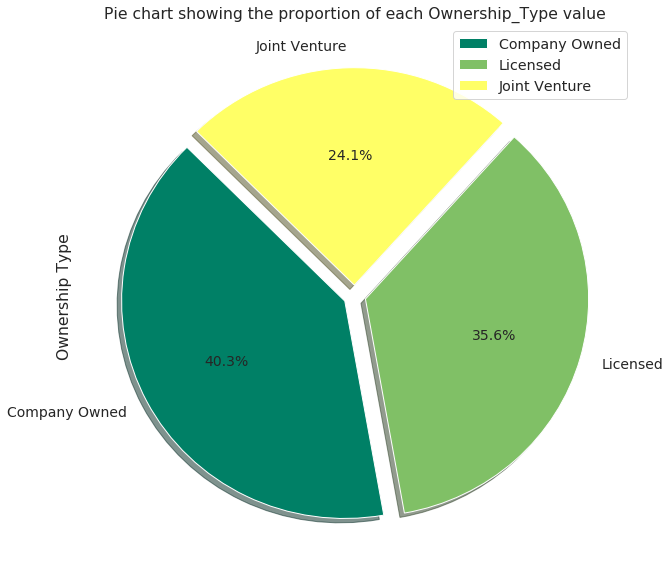

In [22]:
df_merge['Ownership Type'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('Ownership Type')
plt.title('Pie chart showing the proportion of each Ownership_Type value')

- **40%** of the outlets are **company owned** and **35%** are **Licensed** outlets.


- Around **24%** of the outlets are on **Joint venture**. This is mostly in countries where 100% FDI is/was not allowed to start their own outlets.

<a id=section50102></a>
### 5.1.2 Which outlets generate maximum revenue for the company?

In [23]:
df_merge.iloc[df_merge['Revenue'].sort_values(ascending=False)[:10].index, :]

,Store ID,Store Name,Ownership Type,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
139,10753-102015,19th & Telephone,Company Owned,Moore,OK,US,-97.50,35.32,49.681,4.066,38.749,21.292,17.457,149,4056,Premium Grilled Chicken Classic Sandwich,Chicken & Fish,200,350,28,9.0,2.0,0.0,65,42,8,3,820
133,27316-246764,Fort Sill BX,Licensed,Fort Sill,OK,US,-98.40,34.67,49.416,5.617,35.081,21.178,13.903,148,7112,McDouble,Beef & Pork,147,380,22,17.0,8.0,1.0,75,34,7,2,840
120,76740-99373,Target Cleveland South T-2228,Licensed,Cleveland,OH,US,-81.69,41.46,49.044,12.418,19.764,21.019,-1.255,147,20506,Cinnamon Melts,Breakfast,114,460,6,19.0,9.0,0.0,15,66,32,3,370
210,72668-65003,Super Target Tuscaloosa ST-1787,Licensed,Tuscaloosa,AL,US,-87.51,33.20,48.907,13.431,17.402,20.960,-3.559,146,22564,1% Low Fat Milk Jug,Cold Beverages,236,100,8,2.5,1.5,0.0,10,12,12,0,125
103,15847-160724,Target Gateway T-1401,Licensed,Brooklyn,NY,US,-73.87,40.65,48.779,5.765,34.146,20.905,13.240,146,7545,Sausage McGriddles,Breakfast,141,420,11,22.0,8.0,0.0,35,44,15,2,1030
338,20344-204610,Target Fountain Hills T-1432,Licensed,Fountain Hills,AZ,US,-111.72,33.57,48.745,7.053,31.278,20.891,10.387,146,10091,McFlurry with Reese's Peanut Butter Cups (Medium),Smoothies & Shakes,403,810,21,32.0,15.0,1.0,60,114,103,2,400
258,9813-97844,JFK & McCain,Company Owned,North LIttle Rock,AR,US,-92.25,34.80,48.689,8.021,29.095,20.867,8.228,146,12015,Mocha (Small),Hot Beverages,340,340,10,11.0,7.0,0.0,35,49,42,2,150
302,13949-109207,SR 135 & Faith,Company Owned,Greenwood,IN,US,-86.16,39.61,48.570,2.887,40.275,20.816,19.459,145,1906,Iced Nonfat Caramel Mocha (Large),Hot Beverages,623,370,14,6.0,3.5,0.0,25,65,59,1,250
291,9706-96992,Champaign - 5th & Green,Company Owned,Champaign,IL,US,-88.23,40.11,48.424,12.536,18.908,20.753,-1.846,145,21052,Iced Mocha (Small),Hot Beverages,340,290,8,11.0,7.0,0.0,35,41,34,1,125
105,7381-1628,Elmwood Avenue,Company Owned,Buffalo,NY,US,-78.88,42.92,48.291,8.185,28.352,20.696,7.656,145,12471,"Sausage, Egg & Cheese McGriddles with Egg Whites",Breakfast,205,500,21,26.0,10.0,0.0,50,46,15,2,1320


In [24]:
data = [go.Scattergeo(lon=df_merge.iloc[df_merge['Revenue'].sort_values(ascending=False)[:10].index, :]['Longitude'], 
                      lat=df_merge.iloc[df_merge['Revenue'].sort_values(ascending=False)[:10].index, :]['Latitude'], 
                      text=df_merge.iloc[df_merge['Revenue'].sort_values(ascending=False)[:10].index, :][['Store Name', 'Revenue']], 
                      name='',
                      marker=dict(size=df_merge.iloc[df_merge['Revenue'].sort_values(ascending=False)[:10].index, :]['Revenue']/2, 
                                  color='Green'))]


In [25]:
layout = go.Layout(title=go.layout.Title(text='Top 10 outlets in terms of Revenue (in million INR)'), 
                   showlegend=False,
                   geo=dict(scope='usa', projection=go.layout.geo.Projection(type='albers usa'), showlakes=True,
                            lakecolor='rgb(255, 255, 255)'))

In [26]:
fig = go.Figure(data=data, layout=layout)

In [27]:
iplot(fig)

- All the stores in our **Top 10** for **maximum revenue generation** lie in the **US**.


- The **size** of the **marker** gives the **Revenue** of the outlet, and it can be seen that all the outlets in the **Top 10** have very **similar revenue** (near about **48 - 49 million INR**). 


- The **tooltip** shows the **geographical coordinates, name** and **revenue** of the **outlet**.

<a id=section50103></a>
### 5.1.3 Top 10 Outlets in terms of Profit

In [28]:
df_merge.iloc[df_merge['Profits'].sort_values(ascending=False)[:10].index, :]

,Store ID,Store Name,Ownership Type,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
316,76725-102051,Target Kansas City T-2222,Licensed,Kansas City,KS,US,-94.83,39.13,46.934,13.514,15.326,20.115,-4.789,141,23842,Strawberry Banana Smoothie (Medium),Smoothies & Shakes,453,250,4,1.0,0.0,0.0,5,58,54,3,60
210,72668-65003,Super Target Tuscaloosa ST-1787,Licensed,Tuscaloosa,AL,US,-87.51,33.20,48.907,13.431,17.402,20.960,-3.559,146,22564,1% Low Fat Milk Jug,Cold Beverages,236,100,8,2.5,1.5,0.0,10,12,12,0,125
208,72121-3608,U of AL - Ferguson Cntr,Licensed,Tuscaloosa,AL,US,-87.55,33.21,44.138,12.745,14.334,18.916,-4.582,133,23919,Sprite (Large),Cold Beverages,850,280,0,0.0,0.0,0.0,0,74,74,0,60
220,21772-214865,2001 L St,Company Owned,Washington,DC,US,-77.05,38.90,46.254,12.734,16.390,19.823,-3.433,139,22628,Iced Tea (Child),Hot Beverages,340,0,0,0.0,0.0,0.0,0,0,0,0,5
291,9706-96992,Champaign - 5th & Green,Company Owned,Champaign,IL,US,-88.23,40.11,48.424,12.536,18.908,20.753,-1.846,145,21052,Iced Mocha (Small),Hot Beverages,340,290,8,11.0,7.0,0.0,35,41,34,1,125
120,76740-99373,Target Cleveland South T-2228,Licensed,Cleveland,OH,US,-81.69,41.46,49.044,12.418,19.764,21.019,-1.255,147,20506,Cinnamon Melts,Breakfast,114,460,6,19.0,9.0,0.0,15,66,32,3,370
322,6314-6908,Magazine & Washington,Company Owned,New Orleans,LA,US,-90.08,29.93,44.154,12.329,15.264,18.923,-3.659,133,23005,Vanilla Shake (Medium),Smoothies & Shakes,453,660,14,19.0,12.0,1.0,75,109,81,0,200
299,2659-66300,State Rd 135 & Stonegate,Company Owned,Greenwood,IN,US,-86.16,39.63,46.584,12.325,17.605,19.965,-2.360,140,21599,Iced Caramel Mocha (Large),Hot Beverages,623,460,13,16.0,10.0,0.5,50,65,59,1,250
175,25202-201748,Kroger Southwest Store #572,Licensed,Bartonville,TX,US,-97.13,33.08,41.786,12.145,13.396,17.908,-4.512,126,24101,Ranch Snack Wrap (Grilled Chicken),Snacks & Sides,121,280,16,13.0,4.5,0.0,45,25,2,1,720
138,76482-98011,Target Midwest City T-2061,Licensed,Midwest City,OK,US,-97.40,35.44,44.352,12.119,15.916,19.008,-3.092,133,22431,Premium Crispy Chicken Classic Sandwich,Chicken & Fish,213,510,24,22.0,3.5,0.0,45,55,10,3,990


In [29]:
data = [go.Scattergeo(lon=df_merge.iloc[df_merge['Profits'].sort_values(ascending=False)[:10].index, :]['Longitude'], 
                      lat=df_merge.iloc[df_merge['Profits'].sort_values(ascending=False)[:10].index, :]['Latitude'], 
                      text=df_merge.iloc[df_merge['Profits'].sort_values(ascending=False)[:10].index, :][['Store Name', 'Profits']], 
                      name='',
                      marker=dict(size=df_merge.iloc[df_merge['Profits'].sort_values(ascending=False)[:10].index, :]['Profits'], 
                                  color='Blue'))]


In [30]:
layout = go.Layout(title=go.layout.Title(text='Top 10 outlets in terms of Profit (in million INR)'), 
                   showlegend=False,
                   geo=dict(scope='usa', projection=go.layout.geo.Projection(type='albers usa'), showlakes=True,
                            lakecolor='rgb(255, 255, 255)'))

In [31]:
fig = go.Figure(data=data, layout=layout)

In [32]:
iplot(fig)

- All the stores in our **Top 10** for **maximum profits** also lie in the **US**.


- The **size** of the **marker** gives the **Profit** of the outlet.


- The **tooltip** shows the **geographical coordinates, name** and **profits** of the **outlet**.

<a id=section50104></a>
### 5.1.4 Outlets with highest Number of Employees

In [33]:
df_merge.iloc[df_merge['Number of Employees'].sort_values(ascending=False)[:10].index, :]

,Store ID,Store Name,Ownership Type,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
139,10753-102015,19th & Telephone,Company Owned,Moore,OK,US,-97.50,35.32,49.681,4.066,38.749,21.292,17.457,149,4056,Premium Grilled Chicken Classic Sandwich,Chicken & Fish,200,350,28,9.0,2.0,0.0,65,42,8,3,820
133,27316-246764,Fort Sill BX,Licensed,Fort Sill,OK,US,-98.40,34.67,49.416,5.617,35.081,21.178,13.903,148,7112,McDouble,Beef & Pork,147,380,22,17.0,8.0,1.0,75,34,7,2,840
120,76740-99373,Target Cleveland South T-2228,Licensed,Cleveland,OH,US,-81.69,41.46,49.044,12.418,19.764,21.019,-1.255,147,20506,Cinnamon Melts,Breakfast,114,460,6,19.0,9.0,0.0,15,66,32,3,370
258,9813-97844,JFK & McCain,Company Owned,North LIttle Rock,AR,US,-92.25,34.80,48.689,8.021,29.095,20.867,8.228,146,12015,Mocha (Small),Hot Beverages,340,340,10,11.0,7.0,0.0,35,49,42,2,150
103,15847-160724,Target Gateway T-1401,Licensed,Brooklyn,NY,US,-73.87,40.65,48.779,5.765,34.146,20.905,13.240,146,7545,Sausage McGriddles,Breakfast,141,420,11,22.0,8.0,0.0,35,44,15,2,1030
338,20344-204610,Target Fountain Hills T-1432,Licensed,Fountain Hills,AZ,US,-111.72,33.57,48.745,7.053,31.278,20.891,10.387,146,10091,McFlurry with Reese's Peanut Butter Cups (Medium),Smoothies & Shakes,403,810,21,32.0,15.0,1.0,60,114,103,2,400
210,72668-65003,Super Target Tuscaloosa ST-1787,Licensed,Tuscaloosa,AL,US,-87.51,33.20,48.907,13.431,17.402,20.960,-3.559,146,22564,1% Low Fat Milk Jug,Cold Beverages,236,100,8,2.5,1.5,0.0,10,12,12,0,125
291,9706-96992,Champaign - 5th & Green,Company Owned,Champaign,IL,US,-88.23,40.11,48.424,12.536,18.908,20.753,-1.846,145,21052,Iced Mocha (Small),Hot Beverages,340,290,8,11.0,7.0,0.0,35,41,34,1,125
167,70334-135770,Tennessee Tech University,Licensed,Cookeville,TN,US,-85.50,36.17,48.278,6.953,31.051,20.691,10.361,145,10025,Premium Southwest Salad (without Chicken),Salads,230,140,6,4.5,2.0,0.0,10,20,6,6,150
105,7381-1628,Elmwood Avenue,Company Owned,Buffalo,NY,US,-78.88,42.92,48.291,8.185,28.352,20.696,7.656,145,12471,"Sausage, Egg & Cheese McGriddles with Egg Whites",Breakfast,205,500,21,26.0,10.0,0.0,50,46,15,2,1320


In [34]:
data = [go.Scattergeo(lon=df_merge.iloc[df_merge['Number of Employees'].sort_values(ascending=False)[:10].index, :]['Longitude'], 
                      lat=df_merge.iloc[df_merge['Number of Employees'].sort_values(ascending=False)[:10].index, :]['Latitude'], 
                      text=df_merge.iloc[df_merge['Number of Employees'].sort_values(ascending=False)[:10].index, :][['Store Name', 'Number of Employees']], 
                      name='',
                      marker=dict(size=df_merge.iloc[df_merge['Number of Employees'].sort_values(ascending=False)[:10].index, :]['Number of Employees']/7, 
                                  color='orange'))]


In [35]:
layout = go.Layout(title=go.layout.Title(text='Top 10 outlets in terms of Number of Employees'), showlegend=False,
                   geo=dict(scope='usa', projection=go.layout.geo.Projection(type='albers usa'), showlakes=True,
                            lakecolor='rgb(255, 255, 255)'))

In [36]:
fig = go.Figure(data=data, layout=layout)

In [37]:
iplot(fig)

- All the stores in our **Top 10** for **highest number of employees** lie in the **US** as well.


- The **number of employees** in the **top 10** lie in the **range** between **145-149**.


- The **tooltip** shows the **geographical coordinates, name** and **number of employees** of the **outlet**.

<a id=section50105></a>
### 5.1.5 Where do you find the maximum footfall in McDonald's?

In [38]:
df_merge.iloc[df_merge['Customers'].sort_values(ascending=False)[:10].index, :]

,Store ID,Store Name,Ownership Type,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
281,3236-251306,Hwy 44 and Edgewood - Eagle,Company Owned,Eagle,ID,US,-116.33,43.69,38.210,11.449,11.494,16.376,-4.882,116,24964,Caramel Iced Coffee (Large),Hot Beverages,907,260,2,9.0,6.0,0.0,35,43,42,0,65
57,19530-197407,Bandra East - FIFC,Joint Venture,Mumbai,MH,IN,72.87,19.07,9.918,2.953,3.025,4.251,-1.225,99,24780,McFloat Fanta,Desserts,237,152,2,2.0,1.1,0.1,3,32,31,0,390
51,20457-205766,Thane West - Korum Mall,Joint Venture,Mumbai,MH,IN,72.97,19.20,9.850,2.914,3.045,4.221,-1.176,98,24599,Kinley Water,Cold Beverages,500,0,0,0.0,0.0,0.0,0,0,0,0,0
275,73744-103865,Hy-Vee - Bettendorf #1,Licensed,Bettendorf,IA,US,-90.48,41.55,23.799,7.007,7.431,10.200,-2.768,75,24465,Hot Chocolate with Nonfat Milk (Large),Hot Beverages,566,400,19,3.5,2.5,0.0,20,74,69,1,280
38,21743-215051,Church Street,Joint Venture,Bangalore,MH,IN,77.61,12.97,9.754,2.860,3.073,4.180,-1.108,97,24344,Regular Coca-Cola,Cold Beverages,249,110,0,0.0,0.0,0.0,0,27,27,0,230
128,76916-131305,Target Wasilla T-2339,Licensed,Wasilla,AK,US,-149.41,61.58,40.710,11.895,12.912,17.447,-4.535,123,24250,Double Quarter Pounder with Cheese,Beef & Pork,283,750,48,43.0,19.0,2.5,160,42,10,3,1280
327,18029-182674,Kroger Shreveport # 539,Licensed,Shreveport,LA,US,-93.72,32.45,21.969,6.409,6.991,9.415,-2.424,69,24205,Chocolate Shake (Small),Smoothies & Shakes,340,560,12,16.0,10.0,1.0,60,91,77,1,240
20,19514-197404,Indira Gandhi Itnl Arpt-T3Gate27,Joint Venture,New Delhi,DL,IN,77.10,28.56,9.686,2.821,3.092,4.151,-1.060,97,24162,Large Fries,Snacks & Sides,220,685,10,35.0,16.2,0.2,0,82,1,9,520
255,11709-104595,Maumelle & Audubon,Company Owned,Maumelle,AR,US,-92.40,34.85,33.984,9.891,10.866,14.565,-3.699,104,24139,Nonfat Latte with Sugar Free French Vanilla Syrup (Small),Hot Beverages,340,140,10,0.0,0.0,0.0,5,24,13,1,150
175,25202-201748,Kroger Southwest Store #572,Licensed,Bartonville,TX,US,-97.13,33.08,41.786,12.145,13.396,17.908,-4.512,126,24101,Ranch Snack Wrap (Grilled Chicken),Snacks & Sides,121,280,16,13.0,4.5,0.0,45,25,2,1,720


In [39]:
data = [go.Scattergeo(lon=df_merge.iloc[df_merge['Customers'].sort_values(ascending=False)[:10].index, :]['Longitude'], 
                      lat=df_merge.iloc[df_merge['Customers'].sort_values(ascending=False)[:10].index, :]['Latitude'], 
                      text=df_merge.iloc[df_merge['Customers'].sort_values(ascending=False)[:10].index, :][['Store Name', 'Customers']], 
                      name='',
                      marker=dict(size=df_merge.iloc[df_merge['Customers'].sort_values(ascending=False)[:10].index, :]['Customers']/3000, 
                                  color='green'))]

In [40]:
layout = go.Layout(title=go.layout.Title(text='Top 10 outlets in terms of Number of Customers'), showlegend=False,
                   geo=go.layout.Geo(resolution=110, scope='world', showframe=False, showcoastlines=True,
                                     landcolor="rgb(229, 229, 229)", countrycolor="white", coastlinecolor="white"))

In [41]:
fig = go.Figure(data=data, layout=layout)

In [42]:
iplot(fig)

- In case of the **Customer count, 6 outlets** are from the **US** and **4** are from **India** in our **Top 10** outlets with **highest number of customers**.


- The **tooltip** shows the **geographical coordinates, name** and **number of customers** of the **outlet**.

<a id=section502></a>
## 5.2 Analysis Based on Nutritional Value

<a id=section50201></a>
### 5.2.1 Which is the most common category on menu?

Text(0,0.5,'Count')

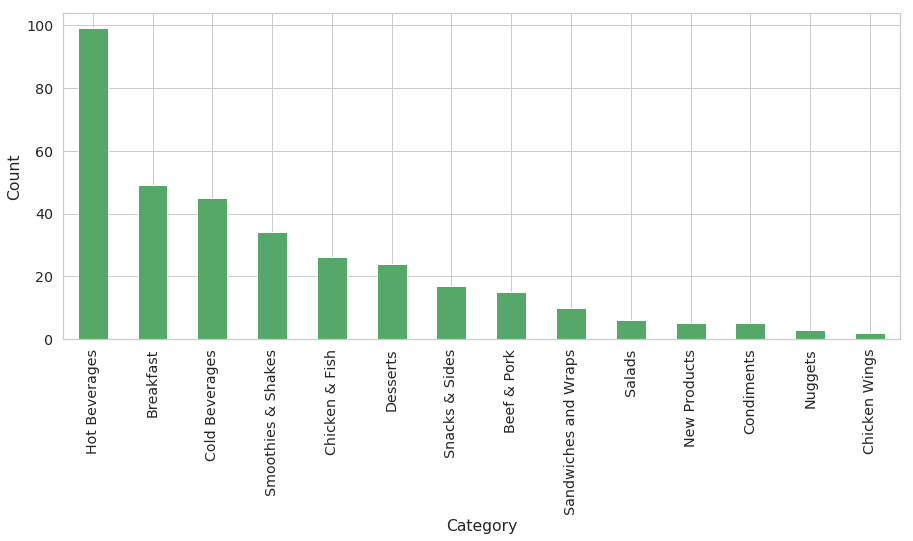

In [43]:
plt.figure(figsize = (15, 6))
df_merge.groupby('Category')['Best Selling Item'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')

- Most items on the **McDonald's menu** belong to the **Hot Beverages** category.

<a id=section50202></a>
### 5.2.2 How many calories (energy) on an average are present in each category of McDonald's menu?

Text(0.5,0,'Calories')

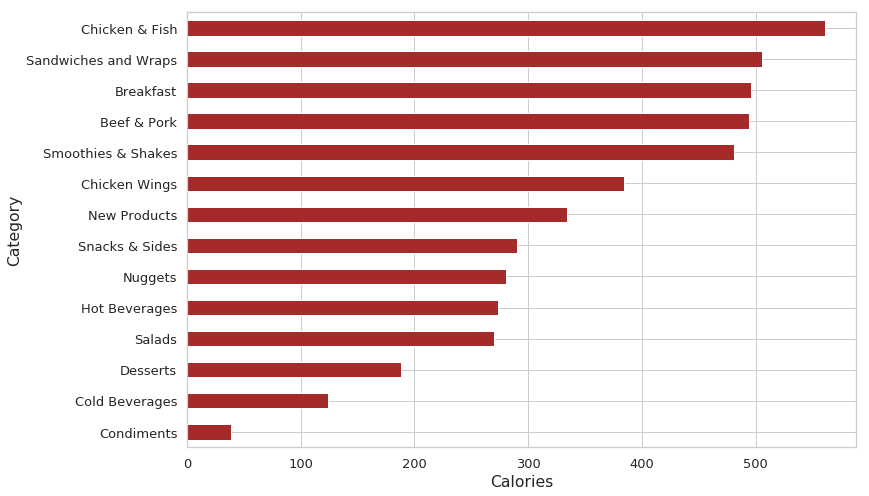

In [44]:
df_merge.groupby(['Category'])['Energy'].mean().sort_values().plot(kind='barh', figsize=(12,8), fontsize=13, color='brown')
plt.xlabel('Calories')

- **Chicken & Fish** category has the **highest calory content** present in them followed by **Sandwiches and Wraps**.


- The **most common category** of **Hot Beverages** have **lesser calory content** than the above mentioned categories.

<a id=section50203></a>
### 5.2.3 Is there any difference in the nutritional value of a grilled vs crispy chicken?

In [45]:
df_merge['Grilled'] = df_merge['Best Selling Item'].str.contains("Grilled")

In [46]:
crispy_df1 = df_merge.loc[df_merge.Grilled == True, 'Best Selling Item'].str.replace('Grilled', 'Crispy')
crispy_df = df_merge.loc[df_merge['Best Selling Item'].isin(crispy_df1), ['Best Selling Item', 'Total Fat']]
grilled_df = df_merge.loc[df_merge.Grilled == True, ['Best Selling Item', 'Total Fat', ]]

In [47]:
df1 = grilled_df.reset_index(drop=True).merge(crispy_df.reset_index(drop=True), left_index=True, right_index=True)
df1.columns = ['Items-Grilled', 'Total Fat-Grilled', 'Items-Crispy', 'Total Fat-Crispy']

In [48]:
df1 = df1.drop('Items-Crispy', axis=1)
df1['Item'] = df1['Items-Grilled'].str.replace("Grilled", "")
df1 = df1.drop('Items-Grilled', axis=1)
df1.index = df1.Item

In [49]:
df1[['Total_Fat-Grilled', 'Total_Fat-Crispy', 'Item']].plot(kind='barh', title="Fat grilled versus crispy", fontsize=13,
                                                            cmap='viridis', figsize=(10, 8))
plt.xlabel('Total Fat')

KeyError: "['Total_Fat-Grilled' 'Total_Fat-Crispy'] not in index"

In [21]:
df_merge.head(2)

,Store ID,Store Name,Ownership Type,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,23149-228271,Banjara Hills,Joint Venture,Hyderabad,AP,IN,78.45,17.42,2.117,0.172,1.655,0.907,0.748,34,3979,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,23191-228548,Kukatpally,Joint Venture,Hyderabad,AP,IN,78.39,17.48,1.059,0.055,0.896,0.454,0.442,25,1156,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950


In [22]:
df_merge['Grilled']=df_merge['Best Selling Item'].str.contains('Grilled')

In [23]:
df_merge['Crispy']=df_merge['Best Selling Item'].str.contains('Crispy')

In [24]:
grilled_df=df_merge.loc[df_merge.Grilled==True,['Best Selling Item','Total_Fat']]
crispy_df=df_merge.loc[df_merge.Crispy==True,['Best Selling Item','Total_Fat']]

In [25]:
grilled_df.reset_index(drop=True).merge(crispy_df.reset_index(drop=True),left_index=True,right_index=True)

,Best Selling Item_x,Total_Fat_x,Best Selling Item_y,Total_Fat_y
0,Premium Grilled Chicken Classic Sandwich,9.0,Premium Crispy Chicken Classic Sandwich,22.0
1,Premium Grilled Chicken Club Sandwich,20.0,Premium Crispy Chicken Club Sandwich,33.0
2,Premium Grilled Chicken Ranch BLT Sandwich,15.0,Premium Crispy Chicken Ranch BLT Sandwich,28.0
3,Bacon Clubhouse Grilled Chicken Sandwich,25.0,Bacon Clubhouse Crispy Chicken Sandwich,38.0
4,Premium McWrap Chicken & Bacon (Grilled Chicken),19.0,Southern Style Crispy Chicken Sandwich,19.0
5,Premium McWrap Chicken & Ranch (Grilled Chicken),18.0,Premium McWrap Chicken & Bacon (Crispy Chicken),32.0
6,Premium McWrap Southwest Chicken (Grilled Chicken),20.0,Premium McWrap Chicken & Ranch (Crispy Chicken),31.0
7,Premium McWrap Chicken Sweet Chili (Grilled Chicken),10.0,Premium McWrap Southwest Chicken (Crispy Chicken),33.0
8,Premium Bacon Ranch Salad with Grilled Chicken,8.0,Premium McWrap Chicken Sweet Chili (Crispy Chicken),23.0
9,Premium Southwest Salad with Grilled Chicken,8.0,Premium Bacon Ranch Salad with Crispy Chicken,21.0


In [26]:
grilled_df.drop(grilled_df[grilled_df['Best Selling Item'] == 'Ranch Snack Wrap (Grilled Chicken)'].index, inplace=True)

In [27]:
crispy_df.drop(crispy_df[crispy_df['Best Selling Item'] == 'Southern Style Crispy Chicken Sandwich'].index,inplace=True)

In [ ]:
df1=grilled_df.reset_index(drop=True).merge(crispy_df.reset_index(drop=True),left_index=True, right_index=True)

In [47]:
df1=grilled_df.reset_index(drop=True).merge(crispy_df.reset_index(drop=True),left_index=True,right_index=True)
df1.columns = ['Items-Grilled','Total_Fat-Grilled', 'Items-Crispy','Total_Fat-Crispy']

In [48]:
df1.head()

,Items-Grilled,Total_Fat-Grilled,Items-Crispy,Total_Fat-Crispy
0,Premium Grilled Chicken Classic Sandwich,9.0,Premium Crispy Chicken Classic Sandwich,22.0
1,Premium Grilled Chicken Club Sandwich,20.0,Premium Crispy Chicken Club Sandwich,33.0
2,Premium Grilled Chicken Ranch BLT Sandwich,15.0,Premium Crispy Chicken Ranch BLT Sandwich,28.0
3,Bacon Clubhouse Grilled Chicken Sandwich,25.0,Bacon Clubhouse Crispy Chicken Sandwich,38.0
4,Premium McWrap Chicken & Bacon (Grilled Chicken),19.0,Premium McWrap Chicken & Bacon (Crispy Chicken),32.0


In [49]:
df1=df1.drop('Items-Crispy', axis=1)
df1['Item'] = df1['Items-Grilled'].str.replace('Grilled',"")
df1=df1.drop('Items-Grilled', axis=1)
df1.index=df1.Item

In [50]:
df1

,Total_Fat-Grilled,Total_Fat-Crispy,Item
Item,,,
Premium Chicken Classic Sandwich,9.0,22.0,Premium Chicken Classic Sandwich
Premium Chicken Club Sandwich,20.0,33.0,Premium Chicken Club Sandwich
Premium Chicken Ranch BLT Sandwich,15.0,28.0,Premium Chicken Ranch BLT Sandwich
Bacon Clubhouse Chicken Sandwich,25.0,38.0,Bacon Clubhouse Chicken Sandwich
Premium McWrap Chicken & Bacon ( Chicken),19.0,32.0,Premium McWrap Chicken & Bacon ( Chicken)
Premium McWrap Chicken & Ranch ( Chicken),18.0,31.0,Premium McWrap Chicken & Ranch ( Chicken)
Premium McWrap Southwest Chicken ( Chicken),20.0,33.0,Premium McWrap Southwest Chicken ( Chicken)
Premium McWrap Chicken Sweet Chili ( Chicken),10.0,23.0,Premium McWrap Chicken Sweet Chili ( Chicken)
Premium Bacon Ranch Salad with Chicken,8.0,21.0,Premium Bacon Ranch Salad with Chicken


Text(0.5,0,'Total Fat')

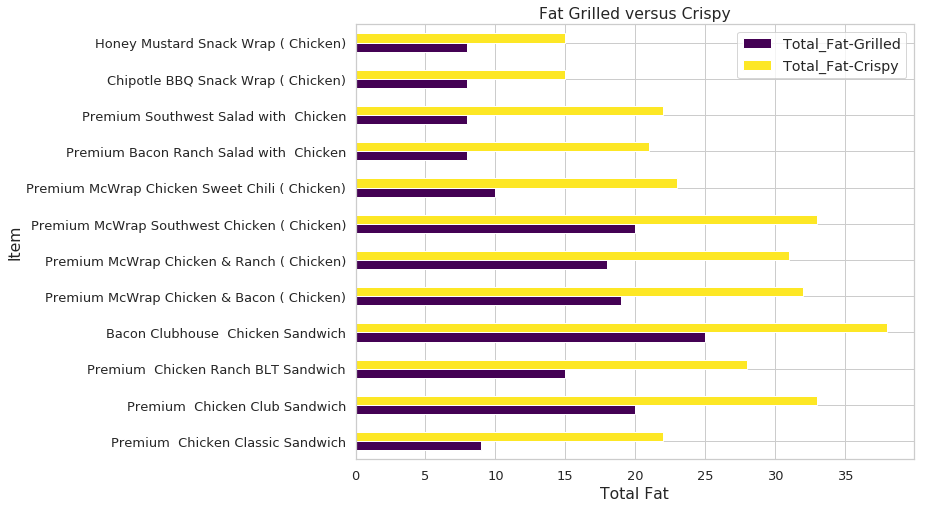

In [52]:
df1[['Total_Fat-Grilled','Total_Fat-Crispy', 'Item']].plot(kind='barh', title='Fat Grilled versus Crispy', fontsize=13, cmap='viridis', figsize=(10,8))
plt.xlabel('Total Fat')

- It is evident form the chart that **Crispy** food items have **higher fat content** present as compared to **Grilled** food items.


- These items (Chicken and Sandwiches) already have a **high calory content** as shown in the previous chart, now we can distinguish them on the basis of **Fat content** as well.

<a id=section50204></a>
### 5.2.4 On an average, how much sugar consumption happens when you order Desserts, Beverages, Smoothies and Shakes?

Text(0,0.5,'Sugar')

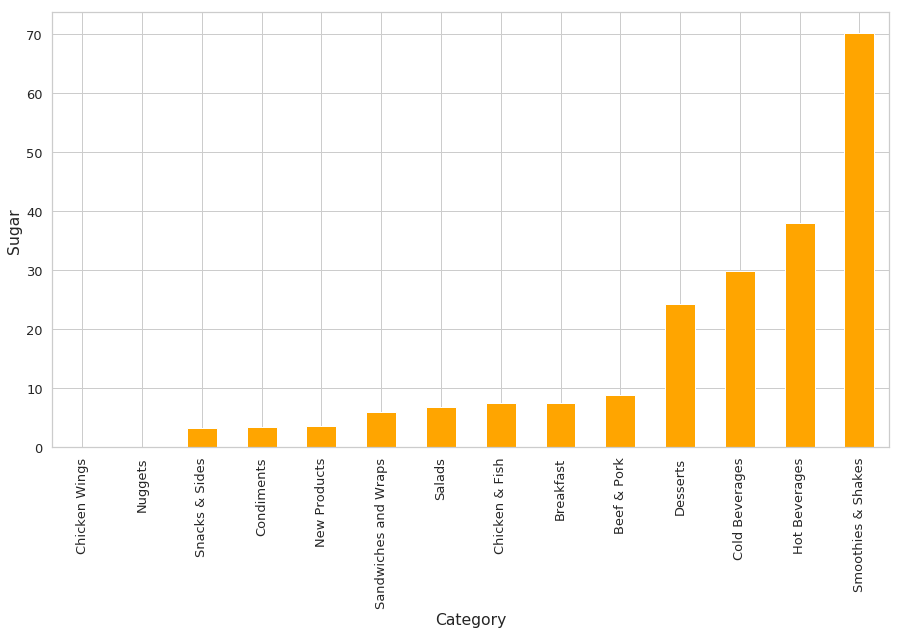

In [58]:
df_merge.groupby(['Category'])['Sugars'].mean().sort_values().plot(kind='bar', figsize=(15,8), fontsize=13, color='orange')
plt.ylabel('Sugar')

- The **Sugar** content present in the **Desserts, Beverages, Smoothies and Shakes** categories is **more than twice** the **sugar** content present in the remaining categories.


- The **most common category** on the menu **Hot Beverages** is only behind **Smoothies and Shakes** in terms of **Sugar content** present in them.


- Take a **cautious approach** with the intake of the items belonging to these categories because **too much sugar intake** has a lot of **side effects**.

<a id=section50205></a>
### 5.2.5 In what sort of foods and beverages do manufacturers include fiber?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

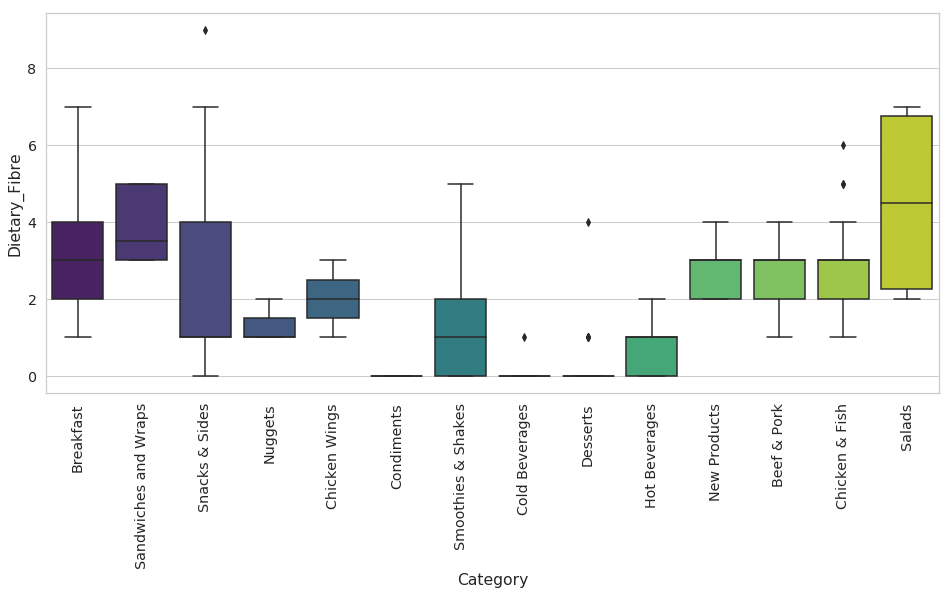

In [59]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=df_merge, x='Category', y='Dietary_Fibre', palette='viridis', width=0.8)
plt.xticks(rotation=90)

- Not only are salads healthy but also have **high fiber content** compared to the other items on the **McDonald's menu**. But, McDonald's only sell a **few different items** in the **Salads** category.


- The categories **Condiments, Cold Beverages** and **Desserts** have **fiber content** near **zero** with some **outliers**.


- The **Hot Beverages** category also has a **very low fiber content** present in it's items. 

In [60]:
category_count = df_merge.groupby('Category').count()
item_count = category_count[['Best Selling Item']].sort_values('Best Selling Item', ascending=False)
item_count

,Best Selling Item
Category,
Hot Beverages,99
Breakfast,49
Cold Beverages,45
Smoothies & Shakes,34
Chicken & Fish,26
Desserts,24
Snacks & Sides,17
Beef & Pork,15
Sandwiches and Wraps,10


- **30%** of McDonald's menu is comprised of **Hot Beverages** while only **2%** is comprised of **Salads**.


- This shows that **McDonald's doesn't care about your health** that much and **will serve** you **items which aren't good for** your **health** in the long run.

<a id=section50206></a>
### 5.2.6 How to select Nutritious and Non-Nutritious food from menu?

In [61]:
Nutritious = ['Protein', 'Dietary_Fibre'] 
Non_Nutritious = ['Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholestrol'] 

df_merge['Nutritious'] = df_merge['Protein'] + df_merge['Dietary_Fibre']
df_merge['Non-Nutritious'] = df_merge['Total_Fat'] + df_merge['Saturated_Fat'] + df_merge['Trans_Fat'] + df_merge['Cholestrol']

In [62]:
df_nutritious = df_merge[df_merge['Category'] == 'Breakfast']
df_nutritious = df_nutritious.groupby(['Best Selling Item']).sum().sort_values(by='Nutritious', ascending=False).head(10)

In [63]:
df_nutritious.head(2)

,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled,Crispy,Nutritious,Non-Nutritious
Best Selling Item,,,,,,,,,,,,,,,,,,,,,,,,
Big Breakfast with Hotcakes (Large Biscuit),-84.51,39.13,37.755,2.670,30.370,16.181,14.190,115,2989,434,1150,36,60.0,20.0,0.0,575,116,17,7,2260,False,False,43,655.0
Big Breakfast with Hotcakes and Egg Whites (Large Biscuit),-84.52,39.13,22.264,2.298,16.319,9.542,6.777,70,6107,437,1050,35,50.0,16.0,0.0,55,115,18,7,2290,False,False,42,121.0


Text(0.5,1,'Food items with high Protein and Fibre Content')

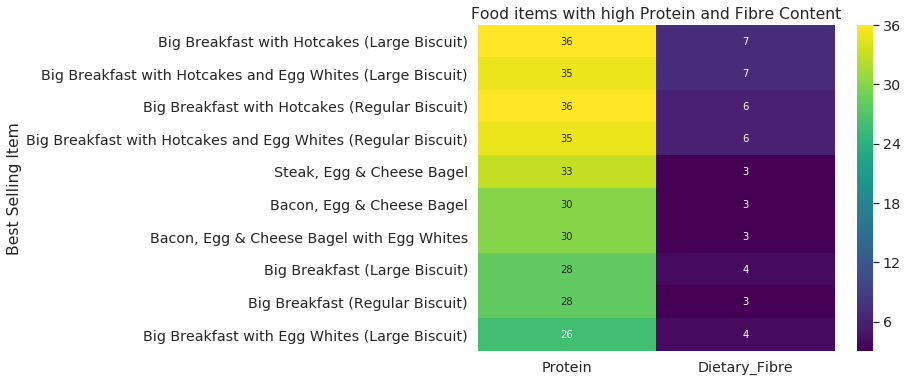

In [64]:
plt.figure(figsize=(8, 6))
df_nutritious = df_nutritious[Nutritious]
sns.heatmap(df_nutritious, annot=True, cmap='viridis')
plt.title('Food items with high Protein and Fibre Content')

In [65]:
df_nutritious = df_merge[df_merge['Category'] == 'Breakfast'] 
df_nutritious = df_nutritious.groupby(['Best Selling Item']).sum().sort_values(by='Non-Nutritious', ascending=False).head(10)

In [66]:
df_nutritious.head(2)

,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled,Crispy,Nutritious,Non-Nutritious
Best Selling Item,,,,,,,,,,,,,,,,,,,,,,,,
Big Breakfast with Hotcakes (Large Biscuit),-84.51,39.13,37.755,2.670,30.370,16.181,14.190,115,2989,434,1150,36,60.0,20.0,0.0,575,116,17,7,2260,False,False,43,655.0
Big Breakfast with Hotcakes (Regular Biscuit),-84.51,39.16,15.004,3.169,7.432,6.430,1.002,50,16476,420,1090,36,56.0,19.0,0.0,575,111,17,6,2150,False,False,42,650.0


Text(0.5,1,'Food items with Fat and Cholestrol')

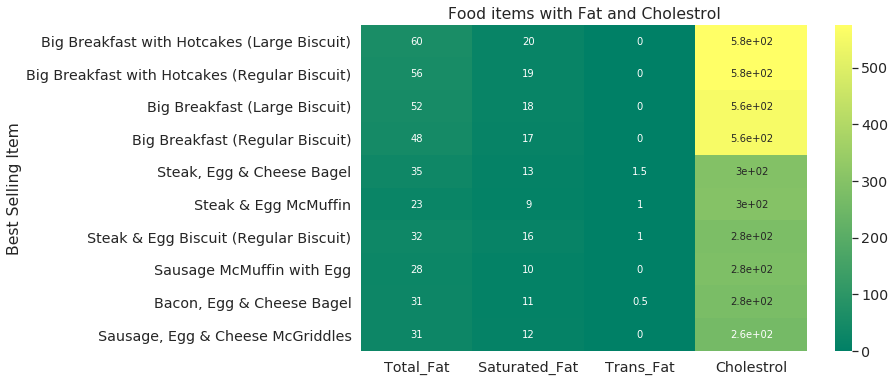

In [67]:
plt.figure(figsize=(10, 6))
df_nutritious = df_nutritious[Non_Nutritious]
sns.heatmap(df_nutritious, annot=True, cmap='summer')
plt.title('Food items with Fat and Cholestrol')

- **Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)** contains **high** amount of **Protein** and **Dietary_Fibre** as seen in the **1st chart** and a **lower** content of **Fat** and **Cholestrol** as seen in the **2nd chart**.


- So it can be a preferable food item for people looking for **higher nutrition** and **lower fats and cholestrol**.

<a id=section50207></a>
### 5.2.7 Which is the most proteinaceous item on the menu?

In [68]:
trace = go.Scatter(y=df_merge['Protein'].values, x=df_merge['Best Selling Item'].values, mode='markers',
                   marker=dict(size=df_merge['Protein'].values, color=df_merge['Protein'].values, colorscale='Rainbow',
                               showscale=True))

In [69]:
data = [trace]

In [70]:
layout = go.Layout(autosize=True, title = go.layout.Title(text='Scatter plot of Protein per Item on the Menu'), 
                   hovermode='closest', xaxis=dict(showgrid=False, zeroline=False, showline=False), 
                   yaxis=dict(title='Protein', ticklen=5, gridwidth=2, showgrid=False, zeroline=False, showline=False), 
                   showlegend=False)

In [71]:
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatterChol')

- It's quite evident that the **most proteinaceous item** on the menu is **Chicken McNuggets (40 pieces).**


- The **tooltip** shows the **name** and **protein content** of the **item**.

<a id=section503></a>
## 5.3 Analysis Based on Geographical Information

<a id=section50301></a>
### 5.3.1 Which city has the highest number of McDonald's outlets per capita?

Text(0,0.5,'Count')

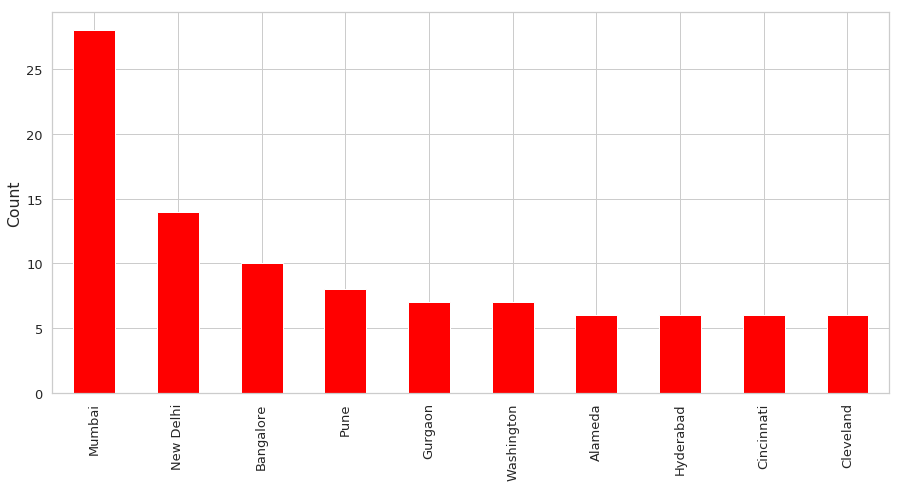

In [72]:
df_merge['City'].value_counts()[:10].plot(kind='bar', figsize=(15,7), fontsize=13, color='red')
plt.ylabel('Count')

- **Mumbai** is the city with the **highest** number of **outlets** in both **US and India**.

<a id=section50302></a>
### 5.3.1 Which state has the highest number of McDonald's outlets per capita?

Text(0.5,0,'Count')

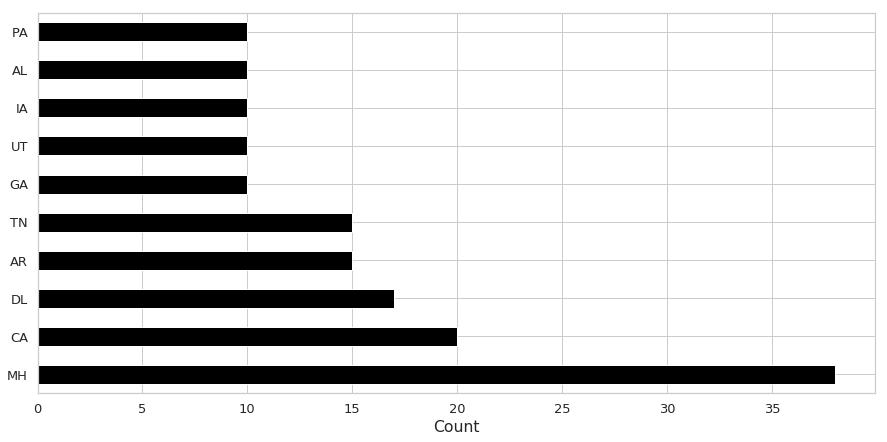

In [73]:
df_merge['State'].value_counts()[:10].plot(kind='barh', figsize=(15,7), fontsize=13, color='black')
plt.xlabel('Count')

- **Maharashtra (MH)** is the state with the **highest** number of **outlets** in both **US and India**, because of the fact that the city with the highest number of stores is **Mumbai** and is the **capital** of **Maharashtra (MH)**.

<a id=section50303></a>
### 5.3.3 Outlet locations in India.

In [74]:
data = [go.Scattergeo(lon=df_merge[df_merge['Country'] == 'IN']['Longitude'], 
                              lat=df_merge[df_merge['Country'] == 'IN']['Latitude'], 
                              text=df_merge[df_merge['Country'] == 'IN']['Store Name'], name='',
                              marker=dict(size=df_merge[df_merge['Country'] == 'IN']['Revenue'], color='Blue'))]

In [75]:
layout = go.Layout(title=go.layout.Title(text='Outlet Locations in India'), showlegend=False,
                   geo=go.layout.Geo(resolution=110, scope='asia', showframe=False, showcoastlines=True,
                                     landcolor="rgb(229, 229, 229)", countrycolor="white", coastlinecolor="white"))

In [76]:
fig = go.Figure(data=data, layout=layout)

In [77]:
# It might take some time to load for the first time depending on the system configurations.

fig.add_trace(go.Scattergeo(lon=[77.4126], lat=[23.2599], text=['India'], mode='text', showlegend=False, geo='geo'))

- It can be seen from the above plot that most of the **McDonald's outlets** in **India** are **concentrated** near **big cities** only.


- The **size of the marker** gives the **Revenue generated** by the outlet, **bigger** the **marker higher** the **revenue**.


- The **tooltip** shows the **geographical coordinates** and **name** of the **outlet**.

<a id=section50304></a>
### 5.3.4 Outlet locations in the US

In [78]:
data = [go.Scattergeo(lon=df_merge[df_merge['Country'] == 'US']['Longitude'], 
                              lat=df_merge[df_merge['Country'] == 'US']['Latitude'], 
                              text=df_merge[df_merge['Country'] == 'US']['Store Name'], name='',
                              marker=dict(size=df_merge[df_merge['Country'] == 'US']['Revenue']/5, color='Green'))]

In [79]:
layout = go.Layout(title=go.layout.Title(text='Outlet Locations in the US'), showlegend=False,
                   geo=dict(scope='usa', projection=go.layout.geo.Projection(type='albers usa'), showlakes=True,
                            lakecolor='rgb(255, 255, 255)'))

In [80]:
fig = go.Figure(data=data, layout=layout)

In [81]:
iplot(fig, filename='d3-cloropleth-map')

- Unlike **India**, the **outlets** in the **US** are **spread thorughout** the **country** and are not limited to the **big cities**.


- The **size of the marker** gives the **Revenue generated** by the outlet, **bigger** the **marker higher** the **revenue**.


- The **tooltip** shows the **geographical coordinates** and **name** of the **outlet**.

<a id=section504></a>
## 5.4 Analysis Based on Outlet metrics and Nutritional value

<a id=section50401></a>
### 5.4.1 Which outlets have most nutritious item as their best selling item?

In [82]:
df_merge.iloc[df_merge['Nutritious'].sort_values(ascending=False)[:10].index, :]

,Store ID,Store Name,Ownership Type,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled,Crispy,Nutritious,Non-Nutritious
162,10084-99523,Houston Levee & Winchester,Company Owned,Collierville,TN,US,-89.73,35.05,23.606,1.575,19.197,10.117,9.080,74,2605,Chicken McNuggets (40 piece),Chicken & Fish,646,1880,87,118.0,20.0,1.0,265,118,1,6,3600,False,False,93,404.0
128,76916-131305,Target Wasilla T-2339,Licensed,Wasilla,AK,US,-149.41,61.58,40.710,11.895,12.912,17.447,-4.535,123,24250,Double Quarter Pounder with Cheese,Beef & Pork,283,750,48,43.0,19.0,2.5,160,42,10,3,1280,False,False,51,224.5
161,17746-178124,Paul Huff & I-75,Company Owned,Cleveland,TN,US,-84.86,35.21,41.815,11.164,15.582,17.921,-2.338,126,21829,Chicken McNuggets (20 piece),Chicken & Fish,323,940,44,59.0,10.0,0.0,135,59,0,3,1800,False,False,47,204.0
145,79622-104108,Safeway - Boring #521,Licensed,Damascus,OR,US,-122.46,45.42,19.283,3.393,11.048,8.264,2.783,62,13091,Bacon Clubhouse Grilled Chicken Sandwich,Chicken & Fish,270,590,40,25.0,8.0,0.0,110,51,14,4,1560,True,False,44,143.0
141,3415-86784,9th & Garfield - Corvallis,Company Owned,Corvallis,OR,US,-123.26,44.58,38.106,8.172,18.605,16.331,2.273,116,16786,Premium Grilled Chicken Club Sandwich,Chicken & Fish,235,510,40,20.0,7.0,0.0,105,44,9,3,1250,True,False,43,132.0
114,75221-94079,U of Cincinnati Student Life Ctr,Licensed,Cincinnati,OH,US,-84.51,39.13,37.755,2.670,30.370,16.181,14.190,115,2989,Big Breakfast with Hotcakes (Large Biscuit),Breakfast,434,1150,36,60.0,20.0,0.0,575,116,17,7,2260,False,False,43,655.0
132,10612-101375,Cleveland & Owen K. Garriott,Company Owned,Enid,OK,US,-97.91,36.39,36.725,3.893,26.690,15.739,10.951,112,6377,Bacon Clubhouse Burger,Beef & Pork,270,720,39,40.0,15.0,1.5,115,51,14,4,1470,False,False,43,171.5
116,2420-201504,University Square,Company Owned,Cincinnati,OH,US,-84.52,39.13,22.264,2.298,16.319,9.542,6.777,70,6107,Big Breakfast with Hotcakes and Egg Whites (Large Biscuit),Breakfast,437,1050,35,50.0,16.0,0.0,55,115,18,7,2290,False,False,42,121.0
113,19787-189469,Kroger - Cincinnati #428,Licensed,Cincinnati,OH,US,-84.51,39.16,15.004,3.169,7.432,6.430,1.002,50,16476,Big Breakfast with Hotcakes (Regular Biscuit),Breakfast,420,1090,36,56.0,19.0,0.0,575,111,17,6,2150,False,False,42,650.0
115,2212-639,Mariemont/The Strand,Company Owned,Cincinnati,OH,US,-84.38,39.15,19.026,1.711,14.500,8.154,6.347,61,4833,Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit),Breakfast,423,990,35,46.0,16.0,0.0,55,110,17,6,2170,False,False,41,117.0


In [83]:
data = [go.Scattergeo(lon=df_merge.iloc[df_merge['Nutritious'].sort_values(ascending=False)[:10].index, :]['Longitude'], 
                      lat=df_merge.iloc[df_merge['Nutritious'].sort_values(ascending=False)[:10].index, :]['Latitude'], 
                      text=df_merge.iloc[df_merge['Nutritious'].sort_values(ascending=False)[:10].index, :][['Store Name', 'Nutritious']], 
                      name='',
                      marker=dict(size=df_merge.iloc[df_merge['Nutritious'].sort_values(ascending=False)[:10].index, :]['Nutritious']/4, 
                                  color='Red'))]


In [84]:
layout = go.Layout(title=go.layout.Title(text='Top 10 outlets in term of Nutritional Content of the Best Selling Item'), 
                   showlegend=False,
                   geo=dict(scope='usa', projection=go.layout.geo.Projection(type='albers usa'), showlakes=True,
                            lakecolor='rgb(255, 255, 255)'))

In [85]:
fig = go.Figure(data=data, layout=layout)

In [86]:
iplot(fig)

- The **size of the marker** gives the **nutritional content** of the **best selling item** of the outlet, **bigger** the **marker higher** the **nutritional content** in the item.


- The **tooltip** shows the **geographical coordinates** and **name** of the **outlet** along with the **nutritional content** value from the **Nutritious** column.

<a id=section50402></a>
### 5.4.2 What is the Revenue  of the outlet based on the category of its best selling item?

Text(0,0.5,'Revenue (in million INR)')

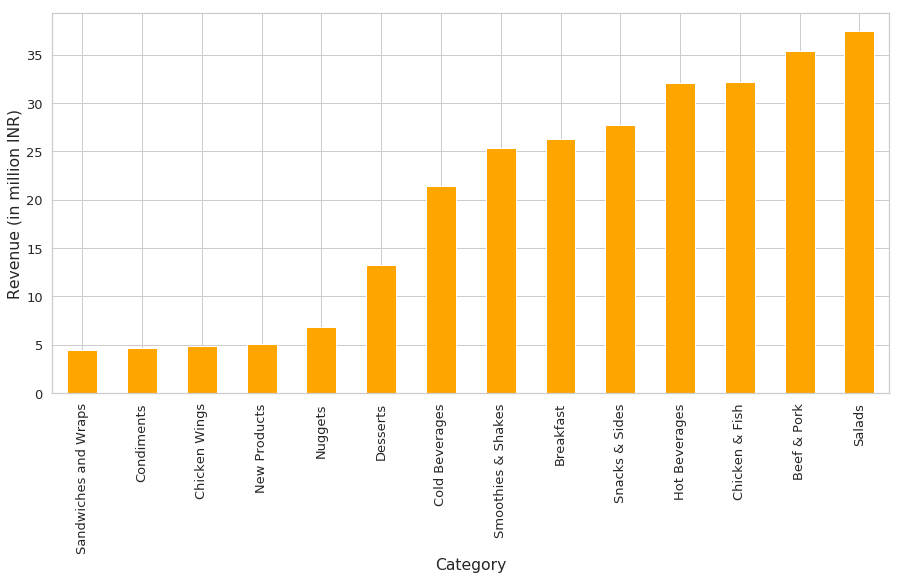

In [87]:
df_merge.groupby(['Category'])['Revenue'].mean().sort_values().plot(kind='bar', figsize=(15,7), fontsize=13, color='orange')
plt.ylabel('Revenue (in million INR)')

- Outlets with their **Best Selling Item** belonging to the **Salads** category earn the **largest revenue** followed by **Beef & Pork** category.


- This tells us that although the **Salads** category have **lower number of items** on the menu, but still the **outlets** having the items belonging to this category as their **best selling item** are generating **very high revenue** as compared to other categories.


- This might be because of the fact that many people have become **health conscious** and only try to **eat healthy food**.

<a id=section50403></a>
### 5.4.3 How much is the Total Selling Price of the outlet based on the category of its best selling item?

Text(0,0.5,'Total Selling Price (in million INR)')

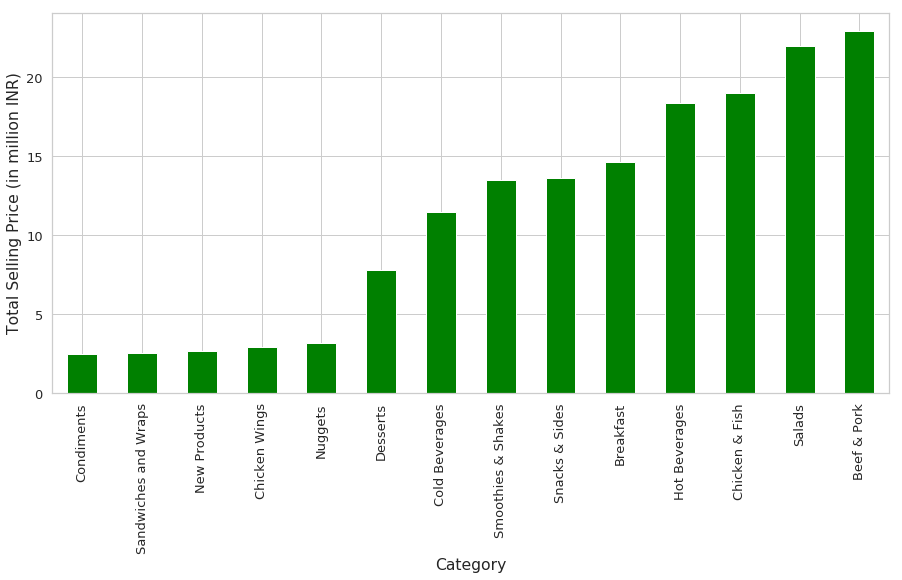

In [88]:
df_merge.groupby(['Category'])['Selling Price'].mean().sort_values().plot(kind='bar', figsize=(15,7), fontsize=13, 
                                                                          color='green')
plt.ylabel('Total Selling Price (in million INR)')

- Outlets with their **Best Selling Item** belonging to the **Beef & Pork** category have the **highest total selling price** followed by **Salads** category.

<a id=section50404></a>
### 5.4.4 How much is the Total Cost Price of the outlet based on the category of its best selling item?

Text(0,0.5,'Total Cost Price (in million INR)')

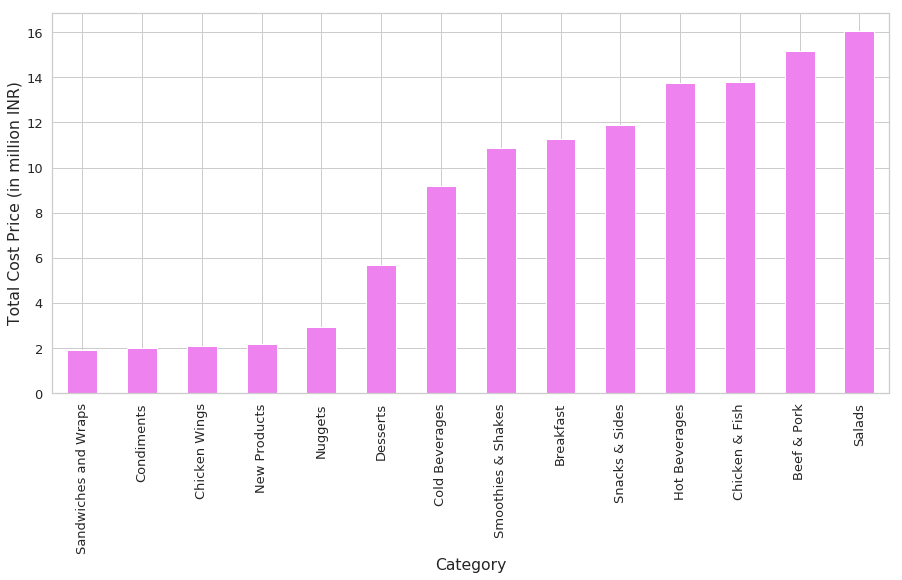

In [89]:
df_merge.groupby(['Category'])['Cost Price'].mean().sort_values().plot(kind='bar', figsize=(15,7), fontsize=13, 
                                                                       color='violet')
plt.ylabel('Total Cost Price (in million INR)')

- Outlets with their **Best Selling Item** belonging to the **Salads** category have the **highest total cost price** closely followed by **Beef & Pork** category.

<a id=section505></a>
## 5.5 Analysis Based on Outlet Metrics and Geographical Information

<a id=section50501></a>
### 5.5.1 Where did McDonald's enter into Joint Venture to start their Outlets?

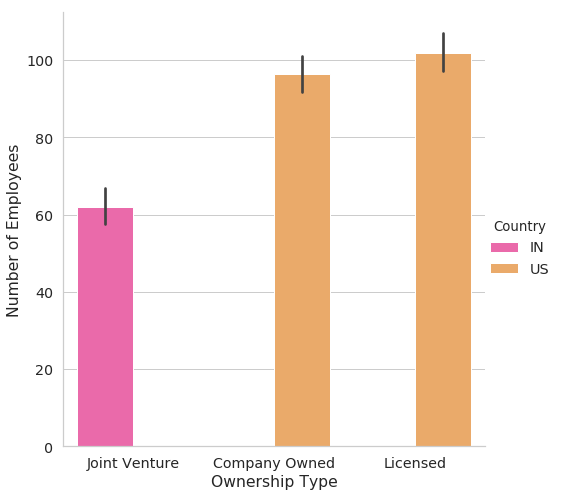

In [90]:
sns.catplot(x='Ownership Type', y='Number of Employees', hue='Country', data=df_merge, height=7, kind='bar', 
            palette='spring')

- McDonald's has **Joint Venture** with other companies in major Asian economies like **India**.


- All the outlets in India are under **Joint Venture between McDonald's, Connaught Plaza Restaurants Limited (CPRL), and Hardcastle Restaurants Pvt. Ltd.** while **American outlets are Company Owned or Licensed**.


- In India, **McDonald's is a 50:50 Joint Venture** company managed by two Indians. 


- While Amit Jatia, M.D. Hardcastle Restaurants Pvt. Ltd. owns and spearheads McDonalds in west & south India, McDonald’s restaurants in North & East India are owned and managed by Vikram Bakshi’s Connaught Plaza Restaurants Private Limited. 

<a id=section50502></a>
### 5.5.2 Top 10 outlets in India and US based on revenue

In [91]:
top10 = pd.concat([df_merge[df_merge['Country'] == 'IN'].iloc[df_merge[df_merge['Country'] == 'IN']['Revenue'].sort_values(ascending=False)[:10].index, :],
                   df_merge.iloc[df_merge['Revenue'].sort_values(ascending=False)[:10].index, :]])
top10.tail()

,Store ID,Store Name,Ownership Type,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled,Crispy,Nutritious,Non-Nutritious
338,20344-204610,Target Fountain Hills T-1432,Licensed,Fountain Hills,AZ,US,-111.72,33.57,48.745,7.053,31.278,20.891,10.387,146,10091,McFlurry with Reese's Peanut Butter Cups (Medium),Smoothies & Shakes,403,810,21,32.0,15.0,1.0,60,114,103,2,400,False,False,23,108.0
258,9813-97844,JFK & McCain,Company Owned,North LIttle Rock,AR,US,-92.25,34.80,48.689,8.021,29.095,20.867,8.228,146,12015,Mocha (Small),Hot Beverages,340,340,10,11.0,7.0,0.0,35,49,42,2,150,False,False,12,53.0
302,13949-109207,SR 135 & Faith,Company Owned,Greenwood,IN,US,-86.16,39.61,48.570,2.887,40.275,20.816,19.459,145,1906,Iced Nonfat Caramel Mocha (Large),Hot Beverages,623,370,14,6.0,3.5,0.0,25,65,59,1,250,False,False,15,34.5
291,9706-96992,Champaign - 5th & Green,Company Owned,Champaign,IL,US,-88.23,40.11,48.424,12.536,18.908,20.753,-1.846,145,21052,Iced Mocha (Small),Hot Beverages,340,290,8,11.0,7.0,0.0,35,41,34,1,125,False,False,9,53.0
105,7381-1628,Elmwood Avenue,Company Owned,Buffalo,NY,US,-78.88,42.92,48.291,8.185,28.352,20.696,7.656,145,12471,"Sausage, Egg & Cheese McGriddles with Egg Whites",Breakfast,205,500,21,26.0,10.0,0.0,50,46,15,2,1320,False,False,23,86.0


In [92]:
data = [go.Scattergeo(lon=top10['Longitude'], lat=top10['Latitude'], text=top10[['Store Name', 'Revenue']], name='',
                      marker=dict(size=top10['Revenue']/2.5, color='Red'))]

In [93]:
layout = go.Layout(title=go.layout.Title(text='Top 10 outlets in India and US based on Revenue (in million INR)'), 
                   showlegend=False,
                   geo=go.layout.Geo(resolution=110, scope='world', showframe=False, showcoastlines=True,
                                     landcolor="rgb(229, 229, 229)", countrycolor="white", coastlinecolor="white"))

In [94]:
fig = go.Figure(data=data, layout=layout)

In [95]:
iplot(fig)

- It can be seen through the **size** of the **points** that the **Revenue** of outlets in **India** is **lower** than that in the **US**.


- The **tooltip** shows the **geographical coordinates** and **name** of the **outlet** along with the **Revenue** of the **outlet**.

<a id=section50503></a>
### 5.5.3 What is the mean revenue of outlets in each US state?

In [96]:
data = [go.Choropleth(colorscale='Viridis', autocolorscale=False, 
                      locations=sorted(df_merge[df_merge['Country'] == 'US']['State'].unique()), locationmode='USA-states', 
                      z=df_merge[df_merge['Country'] == 'US'].groupby(['State'])['Revenue'].mean(), text='Revenue', 
                      colorbar=go.choropleth.ColorBar(title="Revenue (in million INR)"), 
                      marker=go.choropleth.Marker(line=go.choropleth.marker.Line(color='rgb(255,255,255)', width=2)))]

In [97]:
layout = go.Layout(title=go.layout.Title(text='Mean Revenue of Outlets in each US State (in million INR)'), 
                   geo=dict(scope='usa', projection=go.layout.geo.Projection(type='albers usa'), showlakes=True, 
                            lakecolor='rgb(255, 255, 255)'))

In [98]:
fig = go.Figure(data=data, layout=layout)

In [99]:
iplot(fig)

- The **state** with the **highest revenue** in the **US** is **Oklahoma (OK)** with **38.603 million INR** in **Revenue**. 

<a id=section50504></a>
### 5.5.4 How much is the Gross Profit Margin of each outlet?

In [100]:
data = [go.Scattergeo(lon=df_merge['Longitude'], lat=df_merge['Latitude'], text=df_merge[['Store Name', 'Gross Profit Margin']],
                      name='',
                      marker=dict(size=df_merge['Revenue']/2.5, color='Purple'))]

In [101]:
layout = go.Layout(title=go.layout.Title(text='Gross Profit Margin of each outlet (in million INR)'), 
                   showlegend=False,
                   geo=go.layout.Geo(resolution=110, scope='world', showframe=False, showcoastlines=True,
                                     landcolor="rgb(229, 229, 229)", countrycolor="white", coastlinecolor="white"))

In [102]:
fig = go.Figure(data=data, layout=layout)

In [103]:
iplot(fig)

- It can be seen through the **size** of the **points** that the **Gross Profit Margin** of outlets in **India** is **lower** than that in the **US**.


- The **tooltip** shows the **geographical coordinates** and **name** of the **outlet** along with the **Gross Profit Margin** of the **outlet**.

<a id=section506></a>
## 5.6 Analysis based on Nutritional Value and Geographical Information

<a id=section50601></a>
### 5.6.1 Comparison of nutritional content of each category between India and US

In [104]:
nutritional_info = ['Energy', 'Protein', 'Sugars', 'Total_Fat', 'Saturated_Fat', 'Cholestrol', 'Carbohydrates', 
                    'Dietary_Fibre', 'Sodium']

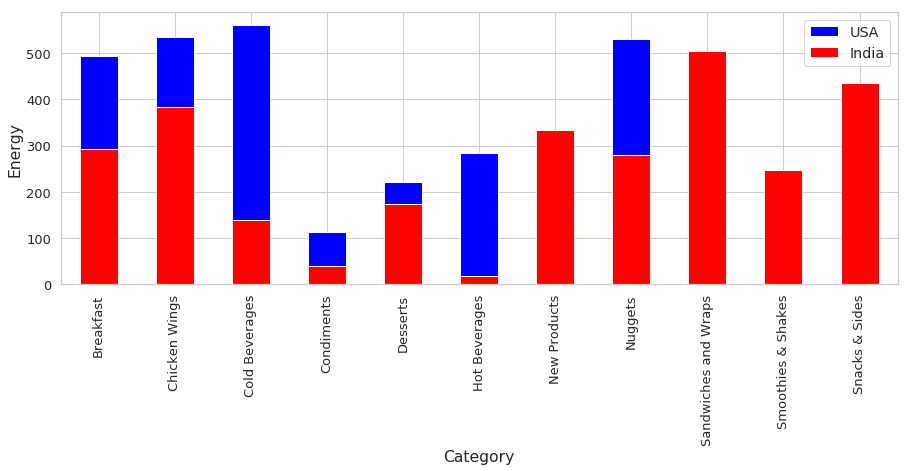

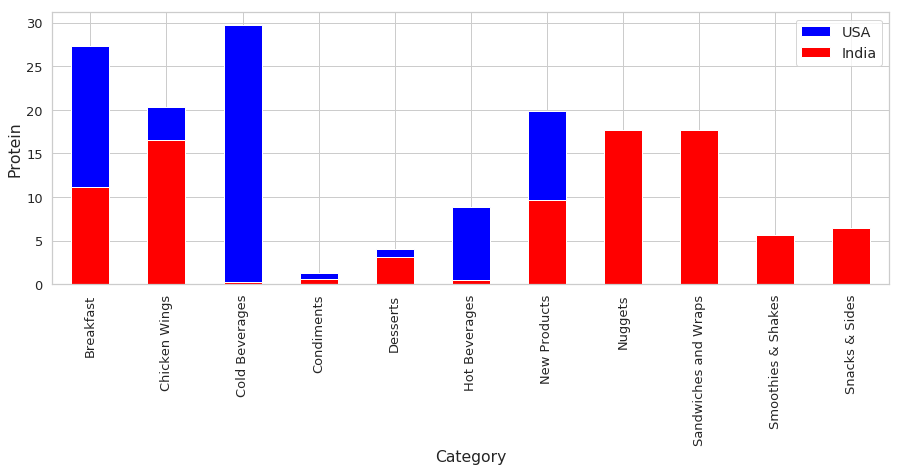

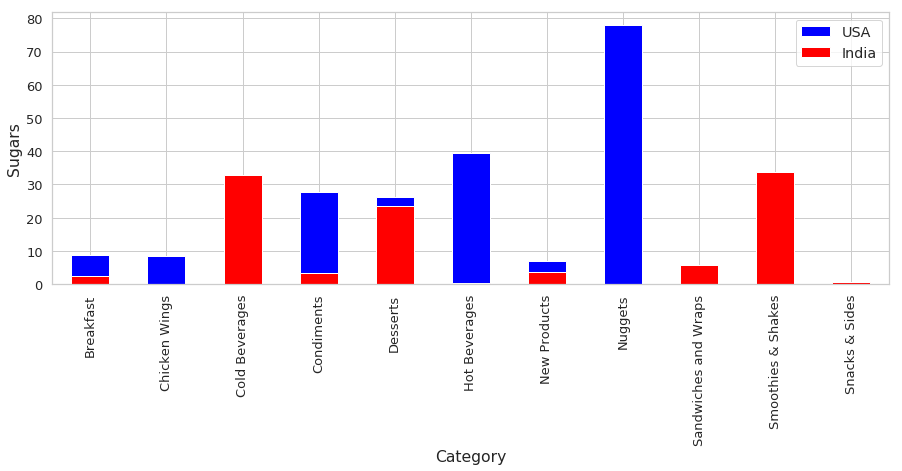

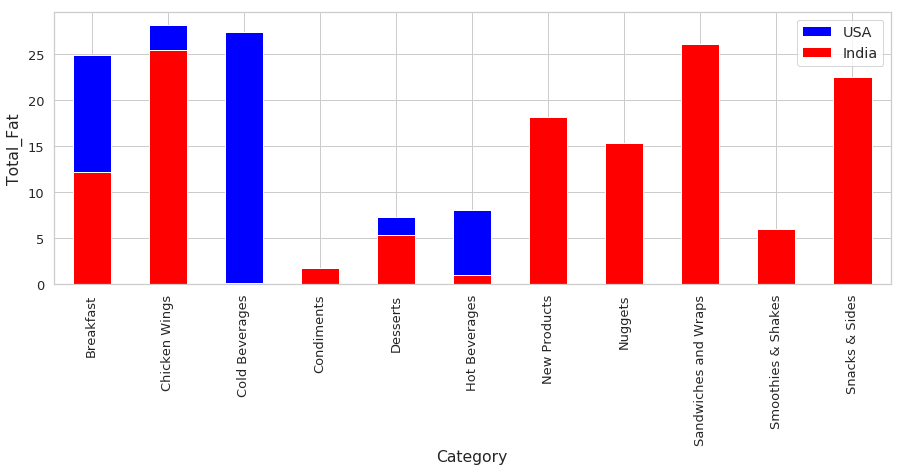

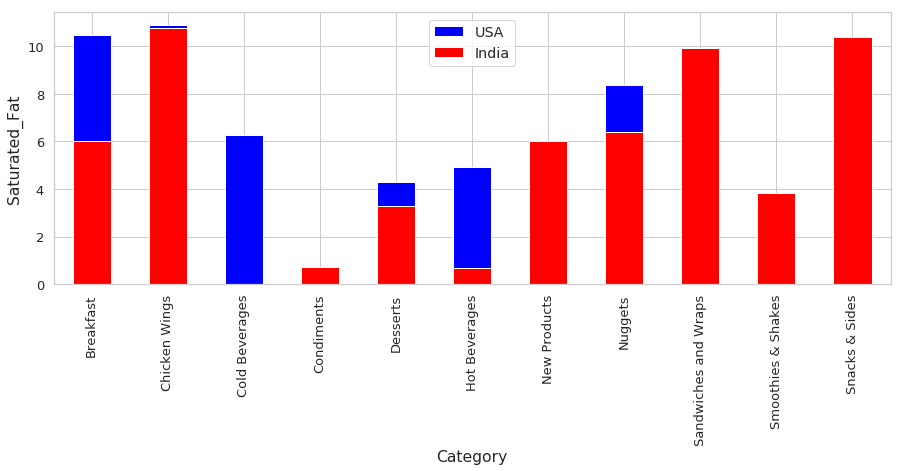

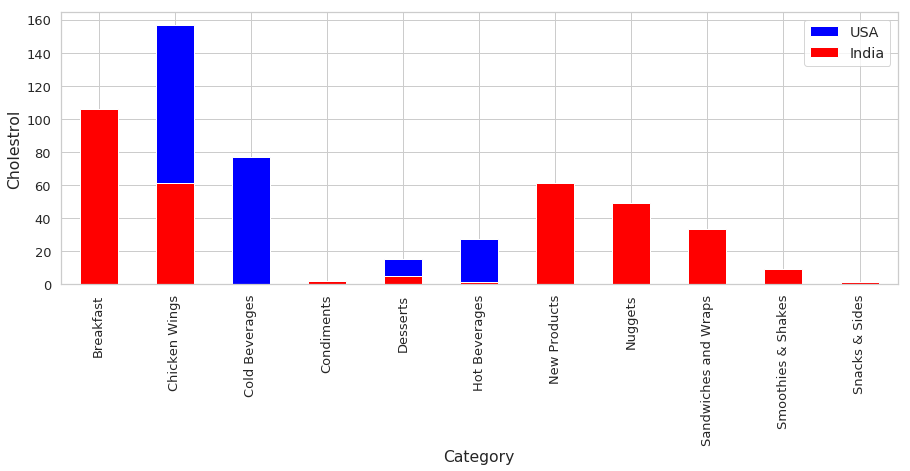

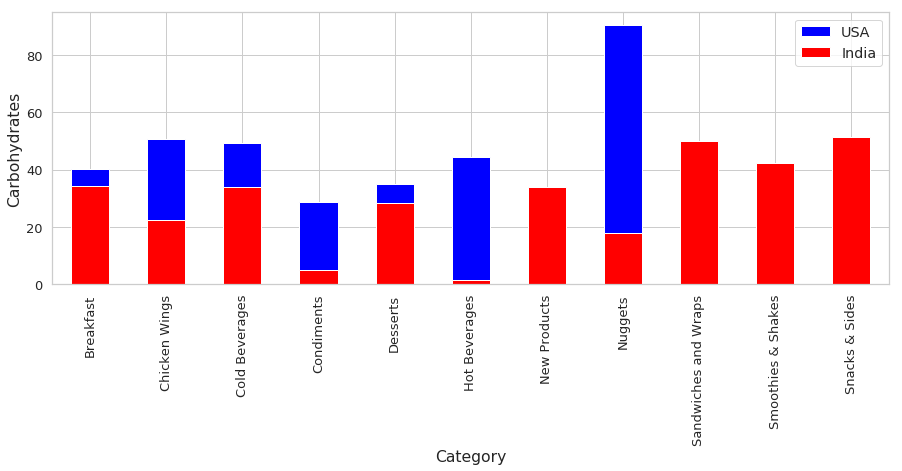

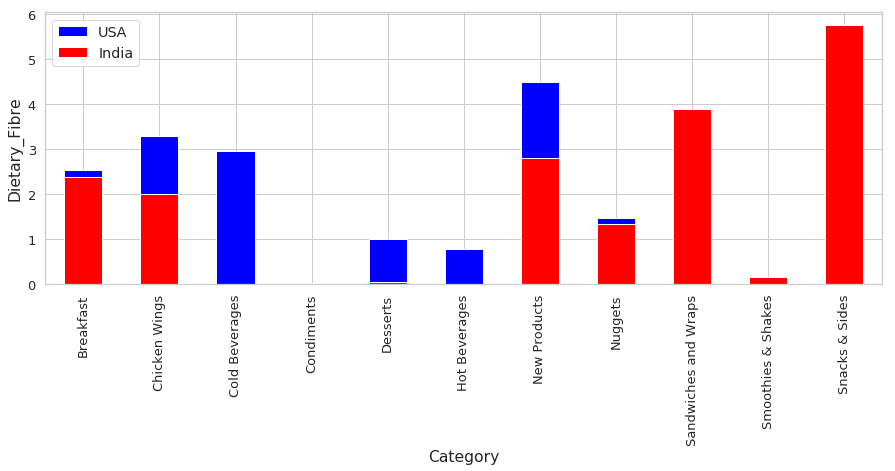

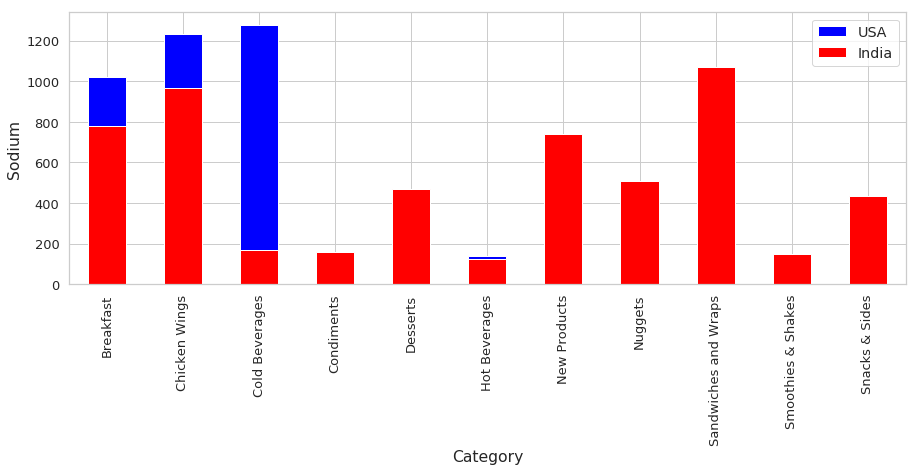

In [105]:
for value in nutritional_info:
    plt.figure(figsize=(15,5))
    df_merge[df_merge['Country'] == 'US'].groupby(['Category'])[value].mean().plot(kind='bar', color='blue', )
    df_merge[df_merge['Country'] == 'IN'].groupby(['Category'])[value].mean().plot(kind='bar', color='red', fontsize=13)
    plt.ylabel(value)
    plt.legend(['USA', 'India'])

From the above charts it is quite evident that **US is rich in nutritional content**. Perhaps, use of **Genetically Modified Food/Crop** might be the reason.


- Some **genetically modified foods** are **designed** to **improve nutrition, quality and taste**. For example, potatoes are modified to even out distribution of starches, enhance texture and reduce fat absorption.


- The **United States leads other countries** in **growing genetically modified foods**. In 2006, 53% of the crops grown in the United States were genetically modified, according to the Human Genome Project. Soybeans, corn and canola are the most common genetically modified crops.

<a id=section50602></a>
### 5.6.2  How are Indian menu items compare to US menu items in terms of nutrition?

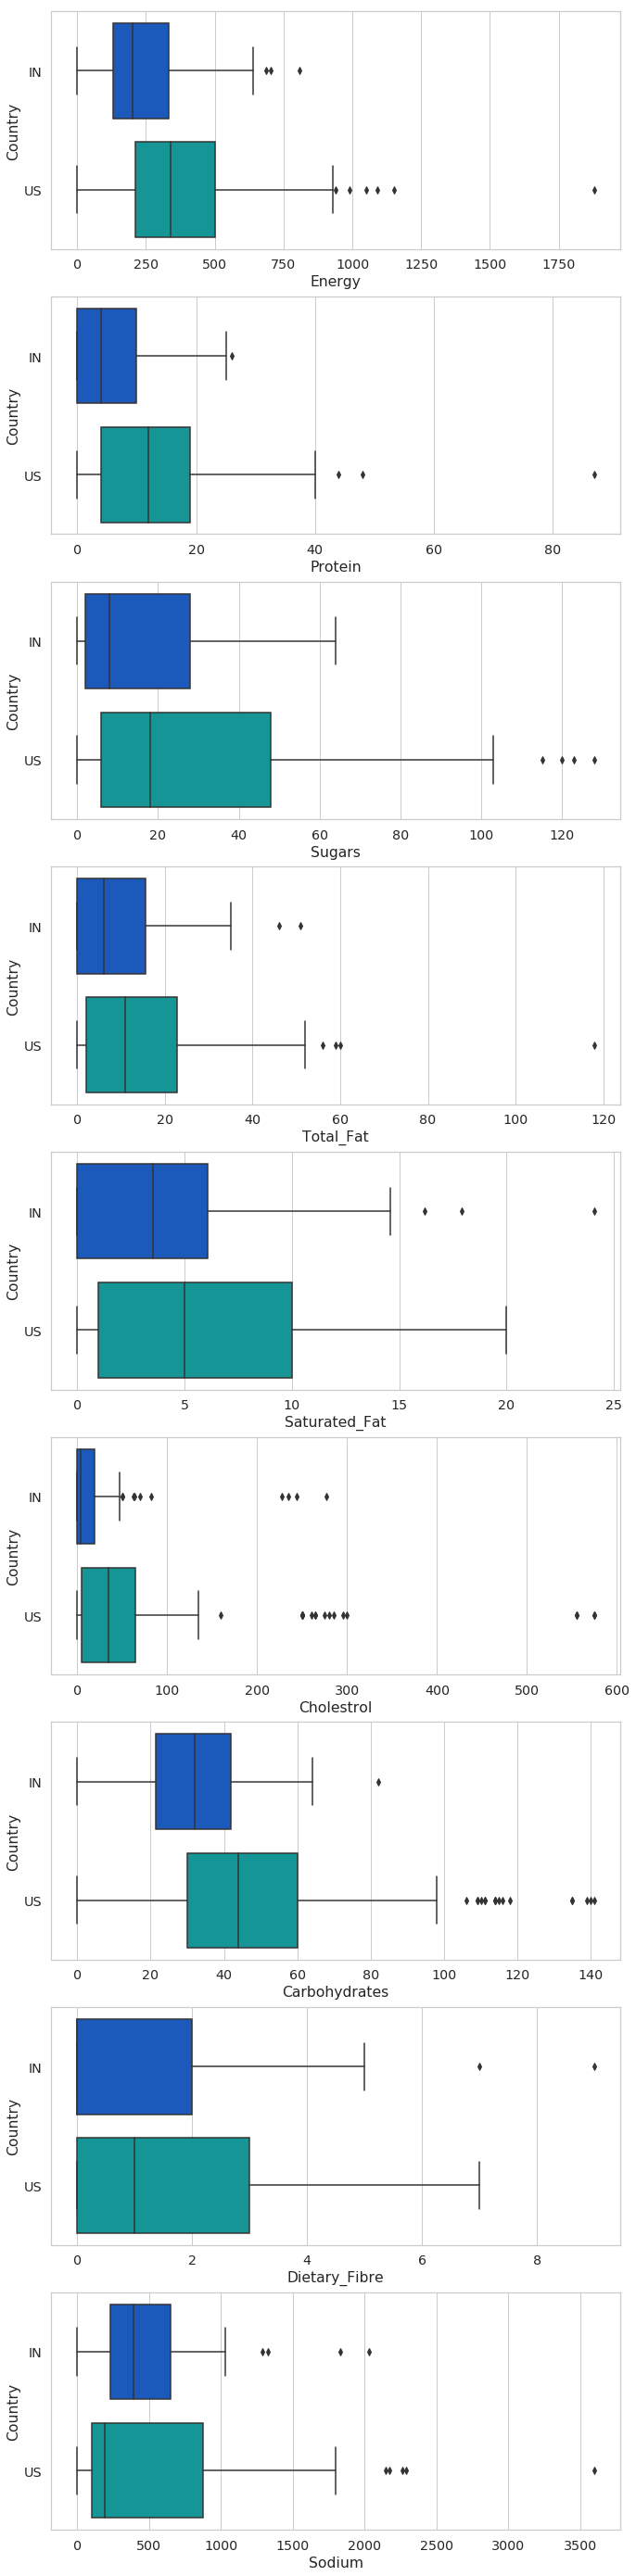

In [106]:
f, axes = plt.subplots(9, 1, figsize=(11, 50))

for key, value in enumerate(nutritional_info):
    sns.boxplot(data=df_merge, x=value, y='Country', orient='h', ax=axes[key], palette='winter')

From the above charts, we can infer the **difference** in the **nutritional content between** the **US** and **Indian McDonald's menu**.

**Scientists** across the world have **identified** two **reasons** for this **declining food nutrition**. 

- One, **intensive agricultural practices** have **stripped the soil of micronutrients**. This could well be the reason for **India** where **soils** have been **found deficient in nutrients**.


- Second, **rising levels of carbon dioxide (CO2) in** the **environment** could also be **affecting plant nutrition levels**. **High CO2 levels in** the **atmosphere lower** the **nitrogen concentration in plants**, which in turn **affects** the **protein content** in food.  

<a id=section507></a>
## 5.7 Analysis based on outlet metrics, menu items, and geographical information

<a id=section50701></a>
### 5.7.1 How is the revenue generation based on different menu items in India and US?

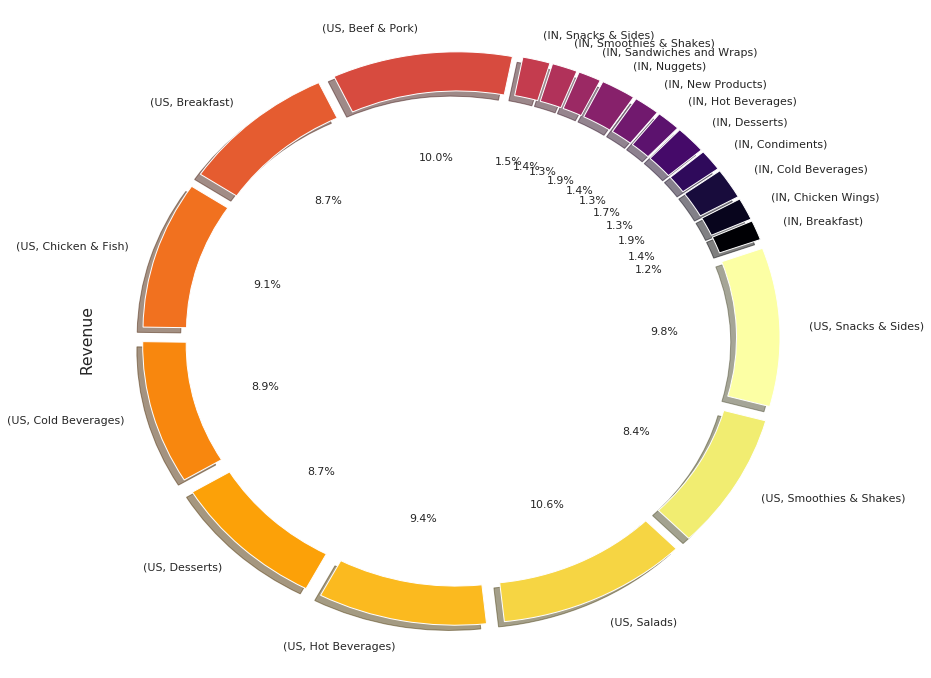

In [107]:
df_merge.groupby(['Country', 'Category'])['Revenue'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                 explode=np.ones(20)/10, figsize=(13, 12), fontsize=11, 
                                                                 startangle=20, shadow=True, cmap='inferno')

We could infer the following from pie chart above:

- **Maximum revenue generation** for **McDonald's** is **from US** as **compared to India**. 


- The reason behind this could be the fact that **McDonald's** have to enter into **Joint-Ventures** in **India**. 

  - Also the **menu** in **India** is not that **diverse** and only a **limited number of items** are **sold in India** when **compared to** the **menu** in the **US**.
  
  - The **number of outlets** in **India** is **lower** as well when **compared to** the **US**.

<a id=section6></a>
## 6. Conclusion

- It is analyzed that the items in menu dataset can be categorized as **nutritious** food and **non-nutritious** food based on different chart diagrams and range values in percentage obtained. 


- So it is beneficial for demonstrating different range values for food nutrients such as **Protein, Sugar, Dietary Fibers, Fats, Carbohydrates, Cholesterol, and Sodium** for their proper consumption from menu items.


- The US food industry has risen as a high-development and high-benefit area because of its huge potential for esteem expansion, especially inside the food processing industry.


- However, India is still taking its initial steps and this could be the reason for McDonald's India not being profitable after many years of operations. 

<a id=section601></a>
### 6.1 Actionable Insights

- In order to **increase** the **outlet metrics** like **Revenue, Profits** in **Indian outlets**, **McDonald's** need to **open new outlets** belonging to the **Company Owned** and **Licensed** ownership types **instead of Joint Ventures**.


- The **nutritional content** of the food items can be **improved** if **good agricultural practices** are taken up in **India** like use of **Genetically Modified Crops (GM Crops)**, **High-Yield-Variety (HYV) seeds**, etc.


- **McDonald's India** needs to **introduce more food items** on the menu, which have **higher nutritional content** like US and will eventually help them **increase** their **revenue and profits**.